# NOTE
## Data Info
+ Sampling Source: Chinese hottest search top10 popular music in past 10 years (102 songs in total)
+ Data Content: Song Name, Singer, Beat, key (song key & data key), chord progression groups 
+ Creator: Jiaying Li, 2022/02/23

## About Data
1. verse/chorus progression[n]: At most 4 progression groups correspond to song phrases.
2. year: Year with the hottest searching or top ten popular, not the time the song was composed or released. 

# Similarity Functions

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Chord Detection, Normalization, Simplification

In [2]:
'''
1 2  3 4  5 6 7  8 9  10 11 12        //chord->numbers (base on semitones)
C C# D D# E F F# G G# A  A# B
C Db D Eb E F Gb G Ab A  Bb B
'''
notes_to_numbers_flat = {'C':1, 'C#':2, 'D':3, 'D#':4, 'E':5, 'F':6, 'F#':7, 'G':8, 'G#':9, 'A':10, 'A#':11, 'B':12} #flat: b
notes_to_numbers_sharp = {'C':1, 'Db':2, 'D':3, 'Eb':4, 'E':5, 'F':6, 'Gb':7, 'G':8, 'Ab':9, 'A':10, 'Bb':11, 'B':12}#sharp: #
numbers_to_notes_flat = {1:'C', 2:'C#', 3:'D', 4:'D#', 5:'E', 6:'F', 7:'F#', 8:'G', 9:'G#', 10:'A', 11:'A#', 12:'B'} #flat: b
numbers_to_notes_sharp = {1:'C', 2:'Db', 3:'D', 4:'Eb', 5:'E', 6:'F', 7:'Gb', 8:'G', 9:'Ab', 10:'A', 11:'Bb', 12:'B'}#sharp: #

In [3]:
def note_add(note_num, add):
    if (note_num + add > 12):
        return (note_num + add - 12)
    else:
        return (note_num + add)

In [4]:
#chord types (take root C as an example)
#C, Cm, Cdim, Caug, C7, Cm7, Cmaj7, C9, Cadd9, Cm9, Cmaj9, C6, Cm6, 
#Csus2, Csus4, C11, C13, Cdim7, Caug7, Cm7b5, C7b5, C7#9
def major(root):
    chord_index_list = [1, 5, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor(root):
    chord_index_list = [1, 4, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dim(root):
    chord_index_list = [1, 4, 7]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def aug(root):
    chord_index_list = [1, 5, 9]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant7(root):
    chord_index_list = [1, 5, 8, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def major7(root):
    chord_index_list = [1, 5, 8, 12]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor7(root):
    chord_index_list = [1, 4, 8, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def add9(root):
    chord_index_list = [1, 5, 8, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def major9(root):
    chord_index_list = [1, 5, 8, 12, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor9(root):
    chord_index_list = [1, 4, 8, 11, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant9(root):
    chord_index_list = [1, 5, 8, 11, 3]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def major6(root):
    chord_index_list = [1, 5, 8, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor6(root):
    chord_index_list = [1, 4, 8, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def sus4(root):
    chord_index_list = [1, 6, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def sus2(root):
    chord_index_list = [1, 3, 8]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant11(root):
    chord_index_list = [1, 5, 8, 11, 3, 6]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dominant13(root):
    chord_index_list = [1, 5, 8, 11, 3, 6, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def minor7flat5(root):
    chord_index_list = [1, 4, 7, 9]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def dim7(root):
    chord_index_list = [1, 4, 7, 10]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def aug7(root):
    chord_index_list = [1, 5, 9, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list    
def sevensharp9(root):
    chord_index_list = [1, 5, 8, 11, 4]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list
def sevenflat5(root):
    chord_index_list = [1, 5, 7, 11]
    chord_list = []
    for i in chord_index_list:
        chord_list.append(note_add(i, root-1))
    return chord_list

In [5]:
def detect_root(chord): #detect root of the chords
    if '/' in chord:
        chord = chord[:chord.find('/')]
    if "'" in chord:
        chord = chord[:chord.find("'")]
    if '#' in chord or 'b' in chord:
        if chord[1]=='#' or chord[1]=='b':
            return chord[:2]
        else:
            return chord[0]
    else:
        return chord[0]
def detect_chord_type(chord):
    if '/' in chord:
        chord = chord[:chord.find('/')]
    if "'" in chord:
        chord = chord[:chord.find("'")]
    if 'm7b5' in chord:
        return 'm7b5'
    else:
        chord = chord.replace('#','')#make root as C
        chord = chord.replace('b','')
        return chord[1:]

In [6]:
def key_normalization(note_num, key_num): #transfer original key to key C
    if (note_num - key_num >= 0): #key_num: original key
        return (note_num-key_num+1)
    else:
        return (13 + note_num - key_num)
def chord_normalization(chord, initial_key):    
    chord_root = detect_root(chord)
    chord_type = detect_chord_type(chord)
    if '#' in chord_root:
        note_num = notes_to_numbers_flat.get(chord_root)
    else:
        note_num = notes_to_numbers_sharp.get(chord_root)
    if '#' in initial_key:
        key_num = notes_to_numbers_flat.get(initial_key)
    else:
        key_num = notes_to_numbers_sharp.get(initial_key)    
    transfer_root = key_normalization(note_num, key_num)
    transfer_note = numbers_to_notes_sharp.get(transfer_root)
    return str(transfer_note)+chord_type
def chord_progression_normalization(chord_list, initial_key):
    if initial_key == 'C':
        return chord_list
    else:
        if chord_list == ['nan']:
            return chord_list
        else:
            normalized_chord_list = []
            for chord in chord_list:
                normalized_chord_list.append(chord_normalization(chord, initial_key))
            return normalized_chord_list
def progression_group_normalization(progression_group, initial_key):
    normalized_group = []
    for chord_list in progression_group:
        normalized_group.append(chord_progression_normalization(chord_list, initial_key))
    return normalized_group

In [7]:
def chord_simplification(chord):
    root_note = detect_root(chord)
    if 'maj' in chord:
        chord_type = ''
    else:
        if 'm' in chord:
            chord_type = 'm'
        else:
            chord_type = ''
    return root_note+chord_type
def chord_progression_simplification(chord_list): #['Am7', 'Em7', 'G7', 'C7']
    simplified_list = []
    for i in chord_list:
        simplified_list.append(chord_simplification(i))
    return simplified_list
def progression_group_simplification(progression_group): #[['Cmaj7', 'Gadd9', 'Am7', 'F11'], ['nan'], ['nan'], ['nan']]
    simplified_group = []
    for chord_list in progression_group:
        if chord_list == ['nan']:
            simplified_group.append(['nan'])
        else:
            simplified_group.append(chord_progression_simplification(chord_list))
    return simplified_group

In [8]:
def root_to_note(root):
    if '#' in root:
        return notes_to_numbers_flat.get(root)
    elif 'b' in root:
        return notes_to_numbers_sharp.get(root)
    else:
        return notes_to_numbers_flat.get(root)
def chord_to_notes(chord): # return note list for chords
    root_note = detect_root(chord)
    if '#' in root_note:
        root = notes_to_numbers_flat.get(root_note)
    else:
        root = notes_to_numbers_sharp.get(root_note)
    chord_type = detect_chord_type(chord)
    if chord_type == '':
        return major(root)
    elif chord_type == 'm':
        return minor(root)
    elif chord_type == 'dim':
        return dim(root)
    elif chord_type == 'aug':
        return aug(root)
    elif chord_type == '7':
        return dominant7(root)
    elif chord_type == 'maj7':
        return major7(root)
    elif chord_type == 'm7':
        return minor7(root)
    elif chord_type == 'add9':
        return add9(root)
    elif chord_type == 'maj9':
        return major9(root)
    elif chord_type == 'm9':
        return minor9(root)
    elif chord_type == '9':
        return dominant9(root)
    elif chord_type == '6':
        return major6(root)
    elif chord_type == 'm6':
        return minor6(root)
    elif chord_type == 'sus4':
        return sus4(root)
    elif chord_type == 'sus2':
        return sus2(root)
    elif chord_type == '11':
        return dominant11(root)
    elif chord_type == '13':
        return dominant13(root)
    elif chord_type == 'm7b5':
        return minor7flat5(root)
    elif chord_type == 'dim7':
        return dim7(root)
    elif chord_type == 'aug7':
        return aug7(root)
    elif chord_type == '7#9':
        return sevensharp9(root)
    elif chord_type == '7b5':
        return sevenflat5(root)
    else:
        print(chord_type, ': unknown, please check again')

## Chord Progression Similarity Index

In [9]:
def transition_matrix(chord_list, first_chord_weight): 
    matrix_list = copy.deepcopy(chord_list)
    matrix_list.append(matrix_list[0])
    matrix = np.zeros((12,12))   
    chord_index = 0
    while chord_index < len(matrix_list) - 1:
        chord1 = matrix_list[chord_index]
        chord2 = matrix_list[chord_index+1]        
        if chord_index == 0:
            for i in chord_to_notes(chord1):
                for j in chord_to_notes(chord2):
                    matrix[i-1][j-1] = matrix[i-1][j-1] + 1 + first_chord_weight
        else:
            for i in chord_to_notes(chord1):
                for j in chord_to_notes(chord2):
                    matrix[i-1][j-1] = matrix[i-1][j-1] + 1
        chord_index = chord_index + 1
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if np.sum(matrix[i]) != 0:
                matrix[i][j] = matrix[i][j]/np.sum(matrix[i])   
    return matrix #return np.array

In [10]:
def root_transition_matrix(chord_list, first_chord_weight):#chord_list:['Am','Cm','Em','G']; first_chord_weight:[0,1]
    root_list = []
    for i in chord_list:
        root_list.append(detect_root(i))
    matrix_list = copy.deepcopy(root_list)
    matrix_list.append(matrix_list[0])
    matrix = np.zeros((12,12))
    root_index = 0    
    while root_index < len(matrix_list) - 1:
        root1 = root_to_note(matrix_list[root_index])-1
        root2 = root_to_note(matrix_list[root_index+1])-1   
        if np.sum(matrix[root1]) == 0:
            matrix[root1][root2] = 1
        else:
            exist = np.count_nonzero(matrix[root1])+1
            for i in range(len(matrix[root1])):
                if matrix[root1][i] != 0:
                    matrix[root1][i] = 1/exist
            matrix[root1][root2] = 1/exist
        root_index = root_index + 1   
    first_root = root_to_note(matrix_list[0])-1
    second_root = root_to_note(matrix_list[1])-1
    if np.count_nonzero(matrix[first_root]) == 1:
        return matrix
    else:
        matrix[first_root][second_root] = matrix[first_root][second_root]*(1+first_chord_weight)
        rest = np.count_nonzero(matrix[first_root])-1
        for i in range(len(matrix[first_root])):
            if (i != second_root) and (matrix[first_root][i] != 0):
                matrix[first_root][i] = (1-matrix[first_root][second_root])/rest
        return matrix

In [11]:
def matrix_distance(matrix1, matrix2): #Euclidean Distance
    sum = 0
    for i in range(0, len(matrix1)): #rows
        for j in range(0, len(matrix1[0])): #colomns
            sum = sum + (matrix1[i][j]-matrix2[i][j])**2
    distance = np.sqrt(sum)
    return distance

In [12]:
def similarity_index_v1(song1, song2, first_chord_weight1, first_chord_weight2): #base on groups: chordlist_song1, chordlist_song2
    matrix = np.zeros((len(song1),len(song2)))
    for i in range(0, len(song1)):
        for j in range(0, len(song2)):
            matrix[i][j]=matrix_distance(transition_matrix(song1[i],first_chord_weight1),transition_matrix(song2[j],first_chord_weight2))
    song1_index1, song2_index1 = 0, 0
    for i in range(0,len(matrix)):
        song1_index1 = song1_index1 + min(matrix[i])
    for i in range(0, len(matrix.transpose())):
        song2_index1 = song2_index1 + min(matrix.transpose()[i])
    return [song1_index1/len(song1), song2_index1/len(song2)]

In [13]:
def similarity_index_v2(song1, song2, first_chord_weight1, first_chord_weight2): #base on songs: chordlist_song1, chordlist_song2
    return matrix_distance(transition_matrix(song1, first_chord_weight1), transition_matrix(song2, first_chord_weight2))

In [14]:
def root_similarity_index_v1(song1, song2, weight1, weight2): #base on groups, first_chord_weight1, first_chord_weight2
    matrix = np.zeros((len(song1),len(song2)))
    for i in range(0, len(song1)):
        for j in range(0, len(song2)):
            matrix[i][j]=matrix_distance(root_transition_matrix(song1[i],weight1),root_transition_matrix(song2[j],weight2))
    song1_index1, song2_index1 = 0, 0
    for i in range(0,len(matrix)):
        song1_index1 = song1_index1 + min(matrix[i])
    for i in range(0, len(matrix.transpose())):
        song2_index1 = song2_index1 + min(matrix.transpose()[i])
    return [song1_index1/len(song1), song2_index1/len(song2)]

In [15]:
def root_similarity_index_v2(song1, song2, first_chord_weight1, first_chord_weight2): #base on songs
    return matrix_distance(root_transition_matrix(song1, first_chord_weight1), root_transition_matrix(song2, first_chord_weight2))

### Examples

In [16]:
song1 = [['Am','Cm','Em','G'],['G','C','Am','G'],['Am','Cm','Em','G'], ['G','C','Am','C']]
song2 = [['Fm','Gm','Em','G'],['G','D','Am','G']]
similarity_index_v1(song1, song2, 0, 0) #smaller the similarity_index_v1 is, larger the similarity is.

[1.756451381607472, 1.8267277824092734]

In [17]:
song1 = [['C', 'G', 'Am', 'F']] 
song2 = [['C', 'G', 'Am', 'Em7'], ['F', 'C', 'Dm7', 'G', 'C'], ['F', 'G', 'Em7', 'Am'], ['F', 'G', 'F', 'G']]
similarity_index_v1(song1, song2, 0.5, 0.5) #smaller the similarity_index_v1 is, larger the similarity is.

[1.4470042258082638, 1.824152724633664]

In [18]:
song1 = ['Am','Cm','Em','G','G','C','Am','G','Am','Cm', 'Em','G','G','C','Am','C']
song2 = ['Fm','Gm','Em','G','G','D','Am','G']
similarity_index_v2(song1, song2, 0.5, 0.5)

2.3481322049349025

# Data Analysis
+ Version 1.x.x: No weight for chords; Version 2.x.x: Add weight to leading chord
+ Version x.1.x: Non-simplified chords; Version x.2.x: Simplified chords; Version x.3.x: Root transistion
+ Version x.x.1: Sentence (progression group) as basic unit; Version x.x.2: Combining all chord progressions together

In [19]:
file = pd.read_excel('data.xlsx')
df = pd.DataFrame(file)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 102 non-null    object
 1   singer               102 non-null    object
 2   year                 102 non-null    int64 
 3   beat                 102 non-null    object
 4   original_key         101 non-null    object
 5   data_key             102 non-null    object
 6   verse_progression1   102 non-null    object
 7   verse_progression2   86 non-null     object
 8   verse_progression3   51 non-null     object
 9   verse_progression4   27 non-null     object
 10  chorus_progression1  102 non-null    object
 11  chorus_progression2  82 non-null     object
 12  chorus_progression3  46 non-null     object
 13  chorus_progression4  10 non-null     object
dtypes: int64(1), object(13)
memory usage: 11.3+ KB


Text(0, 0.5, 'count')

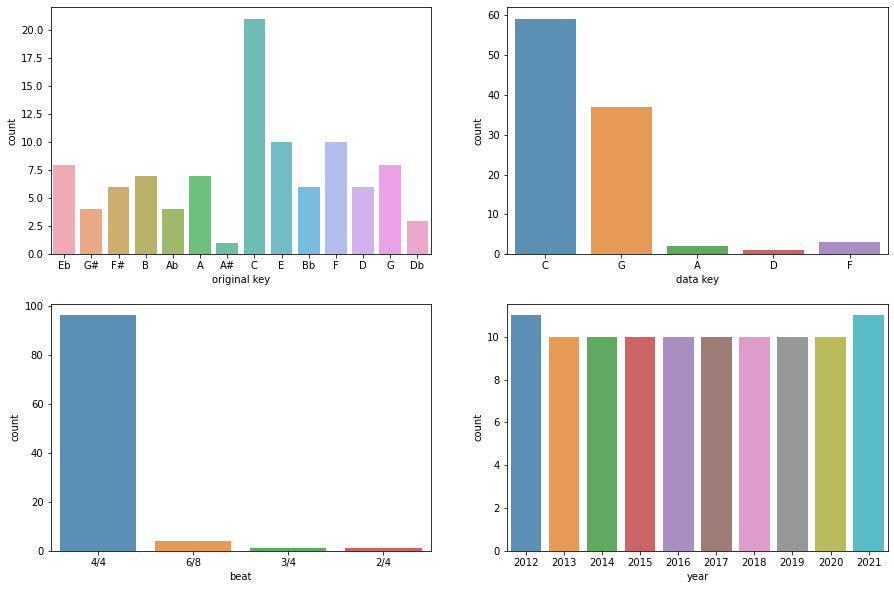

In [21]:
plt.figure(figsize = (15,6))
plt.subplot(221)
sns.countplot(x = df['original_key'], data=df, alpha = 0.8)
plt.xlabel('original key')
plt.ylabel('count')
plt.subplot(222)
sns.countplot(x = df['data_key'], data=df, alpha = 0.8)
plt.xlabel('data key')
plt.ylabel('count')
plt.subplot(223)
sns.countplot(x = df['beat'], data=df, alpha = 0.8)
plt.xlabel('beat')
plt.ylabel('count')
plt.subplot(224)
sns.countplot(x = df['year'], data=df, alpha = 0.8)
plt.xlabel('year')
plt.ylabel('count')

In [22]:
df.head()

,name,singer,year,beat,original_key,data_key,verse_progression1,verse_progression2,verse_progression3,verse_progression4,chorus_progression1,chorus_progression2,chorus_progression3,chorus_progression4
0,云与海,阿YueYue,2021,4/4,Eb,C,Fmaj7->G->Am->Am,Fmaj7->G->C->C,Fmaj7->G->Em->Am,Fmaj7->G->Em7->Am,F->G->Em->Am,F->G->C->C7,NaN,NaN
1,浪子闲话,花僮,2021,4/4,G#,G,Em->D->Bm7->Em,C->D->G->G,C->D->Bm7->Em,C->D->Em->Em,C->D->Bm7->Em,C->D->G->G,C->D->Em->Em,NaN
2,踏山河,是七叔呢,2021,4/4,F#,G,C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,NaN,C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,NaN
3,白月光与朱砂痣,大籽,2021,4/4,B,G,Em->C->Dsus4->G,NaN,NaN,NaN,Em->C->D->G,NaN,NaN,NaN
4,醒不来的梦,回小仙,2021,4/4,Ab,G,Em->D->C->G,Am->Em->Am->B7,NaN,NaN,Em->D->C->G,Am->Em->Am->B7,NaN,NaN


## Version 1.1.1: No weight for any chord; Sentences as unit; No chord simplification

In [23]:
df['verse_progression_sentence'] = df['verse_progression1'].map(str) + ',' + \
                                df['verse_progression2'].map(str) + ',' + \
                                df['verse_progression3'].map(str) + ',' + \
                                df['verse_progression4'].map(str)
df['chorus_progression_sentence'] = df['chorus_progression1'].map(str) + ',' + \
                                df['chorus_progression2'].map(str) + ',' + \
                                df['chorus_progression3'].map(str) + ',' + \
                                df['chorus_progression4'].map(str)
df_chords = df.loc[:, ['name', 'year', 'data_key', 'verse_progression_sentence', 'chorus_progression_sentence']]
df_chords.head()

,name,year,data_key,verse_progression_sentence,chorus_progression_sentence
0,云与海,2021,C,"Fmaj7->G->Am->Am,Fmaj7->G->C->C,Fmaj7->G->Em->...","F->G->Em->Am,F->G->C->C7,nan,nan"
1,浪子闲话,2021,G,"Em->D->Bm7->Em,C->D->G->G,C->D->Bm7->Em,C->D->...","C->D->Bm7->Em,C->D->G->G,C->D->Em->Em,nan"
2,踏山河,2021,G,"C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,nan","C->D->Bm7->Em,C->D->G->B7,C->D->Em->Em,nan"
3,白月光与朱砂痣,2021,G,"Em->C->Dsus4->G,nan,nan,nan","Em->C->D->G,nan,nan,nan"
4,醒不来的梦,2021,G,"Em->D->C->G,Am->Em->Am->B7,nan,nan","Em->D->C->G,Am->Em->Am->B7,nan,nan"


In [24]:
progression_dict_sentence = {} #dictionary:{'yearverse/chorus':[song index][chord progression group][chord]}
for year in range(2012, 2022):
    year_df = df_chords[df_chords['year'] == year]
    year_verse_chord, year_chorus_chord = [], []
    for i in range(0, len(year_df)):
        verse_chord_list, chorus_chord_list = [], []
        verse_progression_all = year_df.iloc[i]['verse_progression_sentence'] 
        chorus_progression_all = year_df.iloc[i]['chorus_progression_sentence'] #F->G->Em->Am,F->G->C->C7,nan,nan
        data_key = year_df.iloc[i]['data_key']
        verse_chords_all = verse_progression_all.split(',')
        chorus_chords_all = chorus_progression_all.split(',') #['F->G->Em->Am','F->G->C->C7','nan','nan']
        for j in range(0, 4):
            verse_chord_list.append(verse_chords_all[j].split('->'))
            chorus_chord_list.append(chorus_chords_all[j].split('->'))#[['F','G','Em','Am'],['F','G','C','C7'],['nan'],['nan']]
            normalized_verse_list = progression_group_normalization(verse_chord_list, data_key)
            normalized_chorus_list = progression_group_normalization(chorus_chord_list, data_key)
        year_verse_chord.append(normalized_verse_list)
        year_chorus_chord.append(normalized_chorus_list)        
    progression_dict_sentence[str(year)+'verse'] = year_verse_chord
    progression_dict_sentence[str(year)+'chorus'] = year_chorus_chord

In [25]:
similarity_dict_whole_v1_sentence = {}
similarity_dict_add_v1_sentence = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0, 0)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0, 0)[0]
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    similarity_dict_add_v1_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v1_sentence[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v1_sentence[str(year)+'chorus'] =  chorus_similarity_index

In [26]:
df_index_whole_v1_sentence = pd.DataFrame(columns = similarity_dict_whole_v1_sentence.keys(), index=list(range(11)))
for i in similarity_dict_whole_v1_sentence.keys():
    for j in range(0, len(similarity_dict_whole_v1_sentence[i])):
        df_index_whole_v1_sentence[i][j] = similarity_dict_whole_v1_sentence[i][j]    
df_index_whole_v1_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.373869,1.605107,0.89096,0.55143,0.998295,0.973323,1.485796,1.011243,1.54962,1.511276,1.429873,1.517342,0.447148,0.588178,2.011909,2.372171,1.552755,1.397862,0.493658,0.972164
1,1.265655,1.348835,1.610002,1.034102,0.855038,1.058824,1.230275,1.083551,1.667269,1.667269,1.694624,0.865857,0.536541,0.598325,0.832356,0.38208,1.131695,0.725994,0.327548,0.0
2,1.036676,0.901763,1.405729,1.029718,1.067608,1.179124,1.354153,1.199113,1.429575,1.429575,1.892333,1.842136,0.707398,2.00367,1.013263,1.208396,1.278777,1.434861,0.607847,0.445452
3,1.257873,0.910825,0.983693,0.55143,1.558475,1.292227,1.219851,1.084258,1.247707,1.247707,1.323752,1.19821,1.845739,1.783301,1.25027,1.396127,1.228723,1.623455,1.093625,1.044587
4,1.18308,0.761456,1.610913,1.657908,0.839436,0.945298,1.407317,1.248632,0.729164,0.967839,1.125442,0.991531,1.141544,1.70527,1.151492,1.244812,1.12634,1.162844,1.454254,1.566926
5,1.340887,0.60482,0.950799,1.23149,1.593023,1.50861,1.309341,1.201471,0.806574,1.393771,1.265557,1.19821,0.536541,0.504543,0.827011,0.985855,0.659007,0.982841,1.093625,1.368765
6,1.706273,0.662291,1.005003,1.499114,1.593023,1.834989,0.462089,1.316383,0.922449,0.992213,1.505346,1.725428,2.097564,1.468856,1.695791,1.513659,1.279976,1.472682,1.075646,0.924602
7,1.691582,1.604985,1.062091,1.095205,0.93029,1.141808,1.270569,1.750866,1.20496,0.997757,1.314293,1.292909,1.226172,0.313461,1.013263,2.222318,1.125423,1.296281,0.981087,0.795333
8,1.028142,0.626908,1.454554,1.374962,0.761751,1.024711,1.376744,1.157886,0.997757,0.997757,1.352447,1.199648,1.511476,0.656983,0.38208,0.410839,1.171125,0.990718,1.318895,0.822059
9,1.275052,0.983938,1.362866,2.029438,1.206966,0.973323,0.949397,1.184295,1.065185,1.009178,1.370983,1.203619,1.32838,0.748455,1.212137,0.202413,0.920482,0.910194,0.393919,0.786442


In [27]:
df_index_add_v1_sentence = pd.DataFrame(columns = similarity_dict_add_v1_sentence.keys(), index=list(range(11)))
for i in similarity_dict_add_v1_sentence.keys():
    for j in range(0, len(similarity_dict_add_v1_sentence[i])):
        df_index_add_v1_sentence[i][j] = similarity_dict_add_v1_sentence[i][j]    
df_index_add_v1_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2.978977,1.44239,1.971618,2.497039,3.060896,2.947215,1.035326,4.38408,2.950617,1.465823
1,2.614491,2.644105,1.913861,2.313827,3.334538,2.560481,1.134867,1.214436,1.857689,0.327548
2,1.938438,2.435446,2.246732,2.553266,2.859151,3.73447,2.711068,2.221659,2.713638,1.053299
3,2.168699,1.535123,2.850701,2.304109,2.495413,2.521963,3.629041,2.646397,2.852178,2.138212
4,1.944537,3.26882,1.784733,2.655949,1.697003,2.116973,2.846815,2.396304,2.289185,3.02118
5,1.945707,2.182288,3.101634,2.510812,2.200345,2.463767,1.041084,1.812865,1.641848,2.46239
6,2.368564,2.504118,3.428012,1.778473,1.914663,3.230773,3.56642,3.20945,2.752658,2.000248
7,3.296567,2.157296,2.072098,3.021435,2.202718,2.607202,1.539633,3.235581,2.421704,1.776419
8,1.65505,2.829517,1.786462,2.53463,1.995515,2.552095,2.168459,0.792919,2.161843,2.140954
9,2.25899,3.392304,2.180289,2.133692,2.074363,2.574602,2.076835,1.414551,1.830676,1.180361


<AxesSubplot:title={'center':'Version 1.1.1 verse similarity'}>

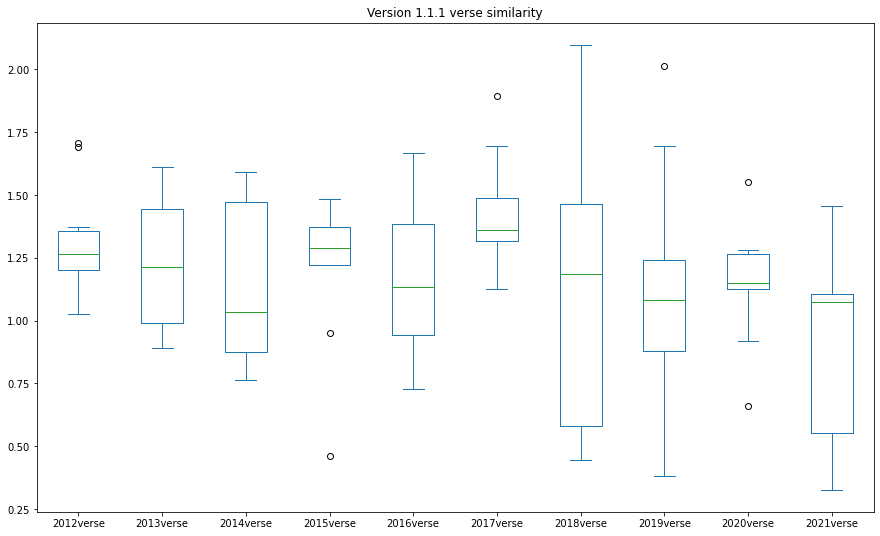

In [28]:
df_index_verse_v1_sentence = df_index_whole_v1_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v1_sentence.plot.box(title = 'Version 1.1.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.1 chorus similarity'}>

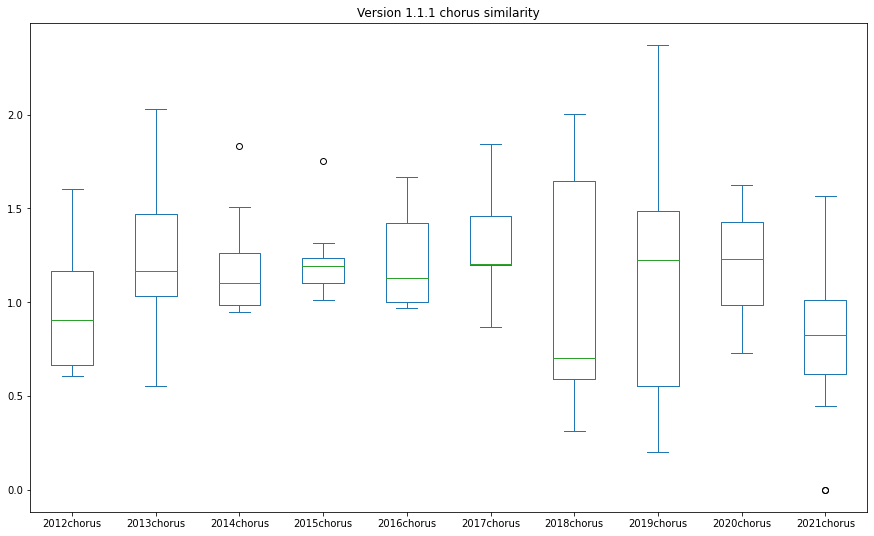

In [29]:
df_index_chorus_v1_sentence = df_index_whole_v1_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v1_sentence.plot.box(title = 'Version 1.1.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.1 total similarity'}>

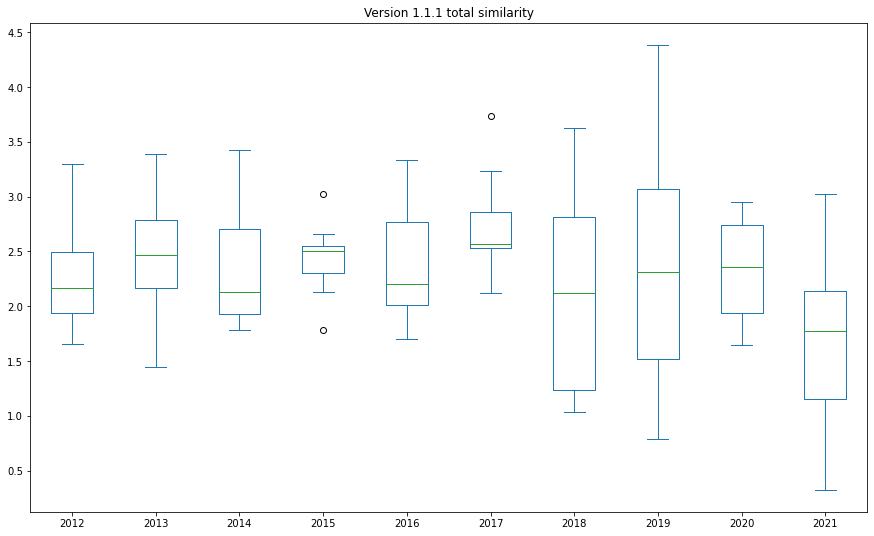

In [30]:
df_index_add_v1_sentence.plot.box(title = 'Version 1.1.1 total similarity', figsize = (15, 6))

## Version 1.1.2: No weight for any chord; Progression as unit; No chord simplification

In [31]:
df.fillna('missing', inplace = True)
def combine_rule(c1, c2, c3, c4):
    if c2 == 'missing' and c3 == 'missing' and c4 == 'missing':
        return ((c1 + '->')*4)[:-2] #1 chord, 234nan
    elif c2 != 'missing' and c3 == 'missing' and c4 == 'missing':
        return ((c1 + '->' + c2 + '->')*2)[:-2] #2 chords, 34nan
    elif c2 != 'missing' and c3 != 'missing' and c4 == 'missing':
        return c1 + '->' + c2 + '->' + c1 + '->' + c3 #3 chords, 4nan
    elif c2 != 'missing' and c3 != 'missing' and c4 != 'missing':
        return c1 + '->' + c2 + '->' + c3 + '->' + c4 #4 chords
    else:
        print('empty')
verse_combine_list, chorus_combine_list = [], []
for i in range(0,len(df)):
    verse_combine_list.append(combine_rule(str(df.iloc[i]['verse_progression1']), str(df.iloc[i]['verse_progression2']),
                                          str(df.iloc[i]['verse_progression3']), str(df.iloc[i]['verse_progression4'])))
    chorus_combine_list.append(combine_rule(str(df.iloc[i]['chorus_progression1']), str(df.iloc[i]['chorus_progression2']),
                                          str(df.iloc[i]['chorus_progression3']), str(df.iloc[i]['chorus_progression4'])))
df['verse_progression_combine'] = verse_combine_list
df['chorus_progression_combine'] = chorus_combine_list
df_progression = df.loc[:, ['name', 'year', 'data_key', 'verse_progression_combine', 'chorus_progression_combine']]
df_progression.head()

,name,year,data_key,verse_progression_combine,chorus_progression_combine
0,云与海,2021,C,Fmaj7->G->Am->Am->Fmaj7->G->C->C->Fmaj7->G->Em...,F->G->Em->Am->F->G->C->C7->F->G->Em->Am->F->G-...
1,浪子闲话,2021,G,Em->D->Bm7->Em->C->D->G->G->C->D->Bm7->Em->C->...,C->D->Bm7->Em->C->D->G->G->C->D->Bm7->Em->C->D...
2,踏山河,2021,G,C->D->Bm7->Em->C->D->G->B7->C->D->Bm7->Em->C->...,C->D->Bm7->Em->C->D->G->B7->C->D->Bm7->Em->C->...
3,白月光与朱砂痣,2021,G,Em->C->Dsus4->G->Em->C->Dsus4->G->Em->C->Dsus4...,Em->C->D->G->Em->C->D->G->Em->C->D->G->Em->C->...
4,醒不来的梦,2021,G,Em->D->C->G->Am->Em->Am->B7->Em->D->C->G->Am->...,Em->D->C->G->Am->Em->Am->B7->Em->D->C->G->Am->...


In [32]:
progression_dict_combine = {}
for year in range(2012, 2022):
    year_df = df_progression[df_progression['year'] == year]
    year_verse_progression, year_chorus_progression = [], []
    for i in range(0, len(year_df)):
        data_key = year_df.iloc[i]['data_key']
        verse_song_list = year_df.iloc[i]['verse_progression_combine'].split('->')
        chorus_song_list = year_df.iloc[i]['chorus_progression_combine'].split('->')
        normalized_verse_list = chord_progression_normalization(verse_song_list, data_key)
        normalized_chorus_list = chord_progression_normalization(chorus_song_list, data_key)       
        year_verse_progression.append(normalized_verse_list)
        year_chorus_progression.append(normalized_chorus_list)
    progression_dict_combine[str(year)+'verse'] = year_verse_progression
    progression_dict_combine[str(year)+'chorus'] = year_chorus_progression

In [33]:
similarity_dict_whole_v1_progression = {}
similarity_dict_add_v1_progression = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0, 0)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0, 0)   
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    similarity_dict_add_v1_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v1_progression[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v1_progression[str(year)+'chorus'] =  chorus_similarity_index

In [34]:
df_index_whole_v1_progression = pd.DataFrame(columns = similarity_dict_whole_v1_progression.keys(), index=list(range(11)))
for i in similarity_dict_whole_v1_progression.keys():
    for j in range(0, len(similarity_dict_whole_v1_progression[i])):
        df_index_whole_v1_progression[i][j] = similarity_dict_whole_v1_progression[i][j]    
df_index_whole_v1_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.491417,1.652315,1.034414,0.678515,1.146743,1.091988,1.846597,1.398866,2.181135,1.631621,1.930582,1.702009,0.646863,0.686966,2.791838,3.215169,1.802013,1.322248,0.485749,1.296387
1,1.79542,1.411836,1.763128,1.251443,1.021562,1.472052,1.071485,1.398866,1.997448,1.997448,1.906023,1.348894,0.545302,0.883861,0.640878,0.374662,0.961244,1.446397,0.192801,0.0
2,0.863419,1.105237,1.832113,1.72648,1.078451,1.617019,1.618221,0.958605,2.101535,2.162901,2.273906,2.184692,0.534352,2.049286,1.555101,1.525809,1.362679,1.621963,0.9053,0.964322
3,0.701708,1.181837,1.189598,0.678515,1.853404,1.809308,1.157622,1.234102,1.176397,1.243926,1.639368,1.17389,1.887413,1.845033,1.267009,1.578091,1.727612,1.826359,1.321535,1.443712
4,1.022306,1.291779,2.142695,2.163944,0.922548,1.370773,1.071485,0.958605,1.024628,1.920769,1.243021,1.628813,1.509522,1.891488,1.483217,1.376865,1.002414,1.16108,1.646858,1.629968
5,0.701708,1.105237,1.189598,1.742011,2.128179,1.501063,1.668683,1.364954,1.295135,1.688942,1.243021,1.628813,0.534352,0.686966,1.267009,1.657647,0.850572,0.943706,1.321535,1.592792
6,1.586797,1.455692,1.157776,1.373836,2.364783,2.140536,1.718092,1.341713,1.119058,1.364551,1.770076,1.662583,2.483219,1.739101,1.551659,1.871997,1.308647,1.603049,1.281203,1.247589
7,2.045712,2.000686,1.511098,1.130682,1.032466,1.472052,1.445149,1.862072,1.419012,1.193546,1.608553,0.890208,1.098578,0.520174,1.519127,2.72774,1.08899,1.494316,1.030664,0.9646
8,0.863419,1.405257,1.034414,1.275268,0.922548,1.421047,1.460463,1.364954,1.419012,1.193546,1.333037,0.890208,1.552219,0.520174,0.640878,0.374662,0.850572,1.26236,1.161189,1.026562
9,1.266126,1.291779,1.883375,2.422225,1.170474,1.091988,1.317213,1.109317,1.024628,1.243926,1.333037,1.507029,1.437455,1.220543,1.53123,1.018349,0.961244,0.943706,0.192801,0.9646


In [35]:
df_index_add_v1_progression = pd.DataFrame(columns = similarity_dict_add_v1_progression.keys(), index=list(range(11)))
for i in similarity_dict_add_v1_progression.keys():
    for j in range(0, len(similarity_dict_add_v1_progression[i])):
        df_index_add_v1_progression[i][j] = similarity_dict_add_v1_progression[i][j]    
df_index_add_v1_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.143732,1.712929,2.238731,3.245463,3.812757,3.632591,1.333829,6.007007,3.124261,1.782136
1,3.207256,3.014571,2.493614,2.470351,3.994895,3.254917,1.429163,1.01554,2.407641,0.192801
2,1.968656,3.558592,2.69547,2.576826,4.264436,4.458599,2.583638,3.08091,2.984641,1.869621
3,1.883545,1.868113,3.662713,2.391724,2.420324,2.813258,3.732447,2.8451,3.553971,2.765248
4,2.314085,4.306639,2.293321,2.03009,2.945397,2.871833,3.40101,2.860082,2.163494,3.276826
5,1.806945,2.931609,3.629242,3.033637,2.984077,2.871833,1.221318,2.924656,1.794278,2.914328
6,3.042489,2.531612,4.505319,3.059805,2.483609,3.432659,4.22232,3.423656,2.911696,2.528793
7,4.046398,2.64178,2.504519,3.307221,2.612557,2.498761,1.618752,4.246867,2.583306,1.995264
8,2.268677,2.309682,2.343595,2.825418,2.612557,2.223245,2.072393,1.01554,2.112932,2.187752
9,2.557905,4.305599,2.262462,2.426531,2.268555,2.840066,2.657998,2.549579,1.90495,1.157401


<AxesSubplot:title={'center':'Version 1.1.2 verse similarity'}>

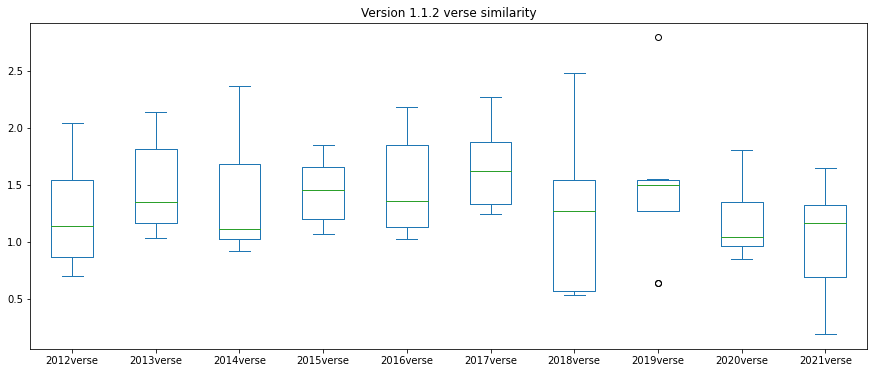

In [36]:
df_index_verse_v1_progression = df_index_whole_v1_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v1_progression.plot.box(title = 'Version 1.1.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.2 chorus similarity'}>

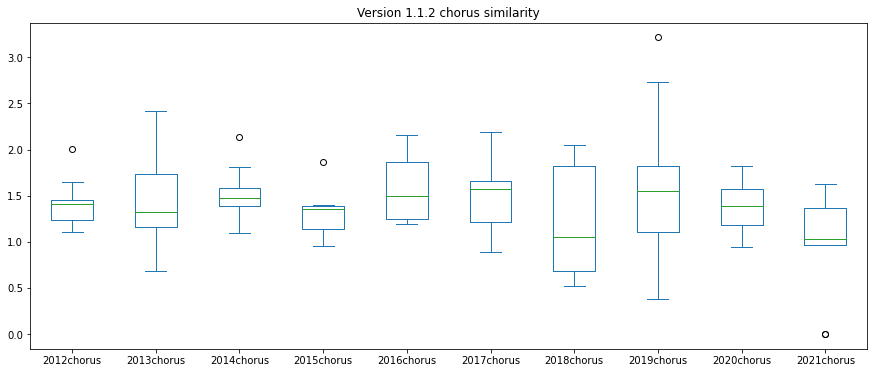

In [37]:
df_index_chorus_v1_progression = df_index_whole_v1_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v1_progression.plot.box(title = 'Version 1.1.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.1.2 total similarity'}>

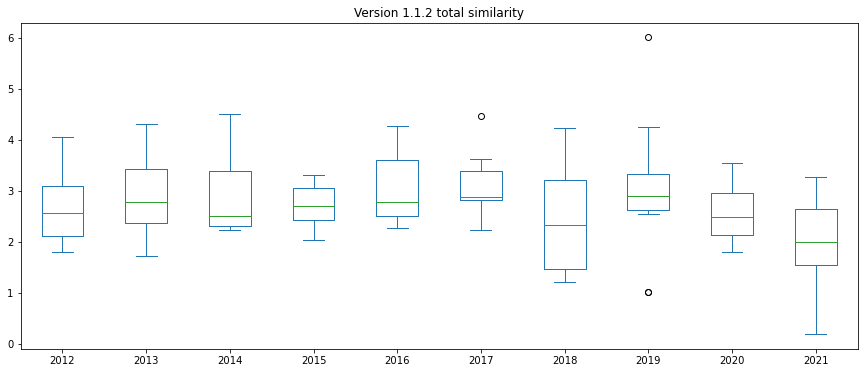

In [38]:
df_index_add_v1_progression.plot.box(title = 'Version 1.1.2 total similarity', figsize = (15, 6))

## Version 1.2.1 No weight for any chord; Sentence as unit; Chord simplification

In [39]:
simplified_dict_sentence_copy = copy.deepcopy(progression_dict_sentence)
simplified_dict_sentence = {} #simplified progression group dictionary
for key in simplified_dict_sentence_copy:
    year_song_list = []
    year_song = simplified_dict_sentence_copy.get(key)
    for progression_group in year_song:
        simplified_group = progression_group_simplification(progression_group)
        year_song_list.append(simplified_group)
    simplified_dict_sentence[key] = year_song_list

In [40]:
simplified_similarity_whole_v1_sentence = {}
simplified_similarity_add_v1_sentence = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0, 0)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0, 0)[0]
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    simplified_similarity_add_v1_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v1_sentence[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v1_sentence[str(year)+'chorus'] =  chorus_similarity_index

In [41]:
df_simplified_whole_v1_sentence = pd.DataFrame(columns = simplified_similarity_whole_v1_sentence.keys(), index=list(range(11)))
for i in simplified_similarity_whole_v1_sentence.keys():
    for j in range(0, len(simplified_similarity_whole_v1_sentence[i])):
        df_simplified_whole_v1_sentence[i][j] = simplified_similarity_whole_v1_sentence[i][j]    
df_simplified_whole_v1_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.396047,1.636966,1.186303,0.0,0.935679,1.318734,1.588111,0.415784,1.005815,0.842705,1.698319,1.674375,0.44973,0.571835,2.194534,2.360768,1.25653,0.885534,0.222805,0.448009
1,1.481023,1.541752,0.393507,0.0,0.776351,0.899417,1.12835,0.485557,1.667269,1.667269,1.631947,0.865857,0.481742,0.646114,0.641316,0.0,0.662291,0.895129,0.0,0.0
2,0.83795,1.120403,1.085372,1.025108,0.86969,1.030143,1.474284,1.165275,1.328655,1.328655,1.365698,1.015778,0.0,2.021912,0.975372,1.09503,1.433992,1.572143,0.331146,0.441527
3,1.293941,0.638859,0.393507,0.0,1.637691,1.211004,1.219851,1.190027,1.499965,1.346867,1.403983,1.19821,1.851702,1.850157,1.256897,1.33971,0.622373,1.446601,0.474998,0.474998
4,1.18005,0.407638,0.489766,0.793139,0.489458,0.493551,1.407317,1.392036,0.396882,0.662291,1.154667,0.992289,0.941973,1.661865,1.199067,1.183653,0.960758,1.074784,1.498909,1.566926
5,0.95369,0.850708,0.876639,0.949716,1.733943,1.52458,1.104536,0.913908,0.639488,1.386821,1.339385,1.19821,0.0,0.480029,0.909361,1.143,0.396882,0.862925,1.552143,1.559549
6,1.716621,0.662291,1.11468,1.366999,1.733943,1.917385,0.462089,1.360808,0.0,0.396882,1.431043,1.710362,2.10129,1.386399,1.626009,1.673766,1.433992,1.572143,1.081103,1.042997
7,1.713529,1.604985,1.246682,0.861486,0.831475,0.961125,1.429288,1.772348,1.164868,0.930061,0.904058,0.904058,0.635567,0.0,0.975372,2.339634,1.180961,1.111252,0.0,0.0
8,0.994309,0.626908,1.538402,1.165631,0.419559,0.610997,1.372299,0.451448,0.930061,0.930061,1.342649,1.294482,1.511476,0.396882,0.0,0.202413,1.388826,0.990718,1.559762,0.662291
9,1.279152,0.983938,1.064813,2.034941,1.659105,1.318734,0.949397,1.079132,0.650314,0.396882,0.0,0.0,0.99657,0.396882,1.212137,0.0,0.662291,0.766965,0.222805,0.441527


In [42]:
df_simplified_add_v1_sentence = pd.DataFrame(columns = simplified_similarity_add_v1_sentence.keys(), index=list(range(11)))
for i in simplified_similarity_add_v1_sentence.keys():
    for j in range(0, len(simplified_similarity_add_v1_sentence[i])):
        df_simplified_add_v1_sentence[i][j] = simplified_similarity_add_v1_sentence[i][j]    
df_simplified_add_v1_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.033013,1.186303,2.254412,2.003895,1.84852,3.372693,1.021565,4.555303,2.142064,0.670814
1,3.022775,0.393507,1.675768,1.613907,3.334538,2.497804,1.127857,0.641316,1.55742,0.0
2,1.958353,2.110479,1.899833,2.639559,2.65731,2.381476,2.021912,2.070402,3.006135,0.772673
3,1.9328,0.393507,2.848695,2.409878,2.846832,2.602193,3.70186,2.596608,2.068974,0.949996
4,1.587688,1.282904,0.983009,2.799353,1.059173,2.146956,2.603838,2.38272,2.035542,3.065835
5,1.804398,1.826356,3.258523,2.018443,2.026309,2.537595,0.480029,2.052361,1.259807,3.111693
6,2.378912,2.481679,3.651328,1.822898,0.396882,3.141406,3.487689,3.299775,3.006135,2.1241
7,3.318513,2.108168,1.7926,3.201636,2.094929,1.808115,0.635567,3.315006,2.292213,0.0
8,1.621217,2.704032,1.030555,1.823748,1.860122,2.637132,1.908359,0.202413,2.379544,2.222053
9,2.26309,3.099754,2.977839,2.02853,1.047196,0.0,1.393452,1.212137,1.429256,0.664333


<AxesSubplot:title={'center':'Version 1.2.1 verse similarity'}>

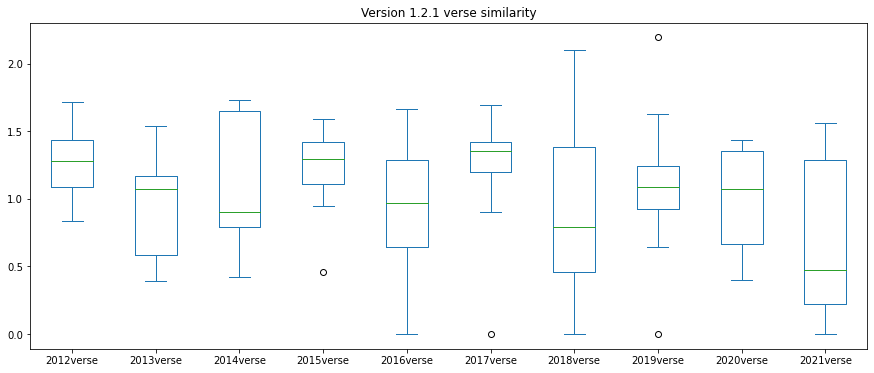

In [43]:
df_simplified_verse_whole_v1_sentence = df_simplified_whole_v1_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v1_sentence.plot.box(title = 'Version 1.2.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.1 chorus similarity'}>

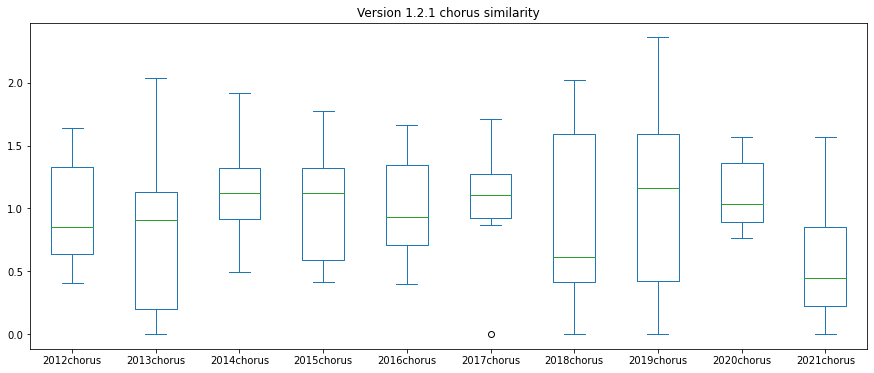

In [44]:
df_simplified_chorus_v1_sentence = df_simplified_whole_v1_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v1_sentence.plot.box(title = 'Version 1.2.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.1 total similarity'}>

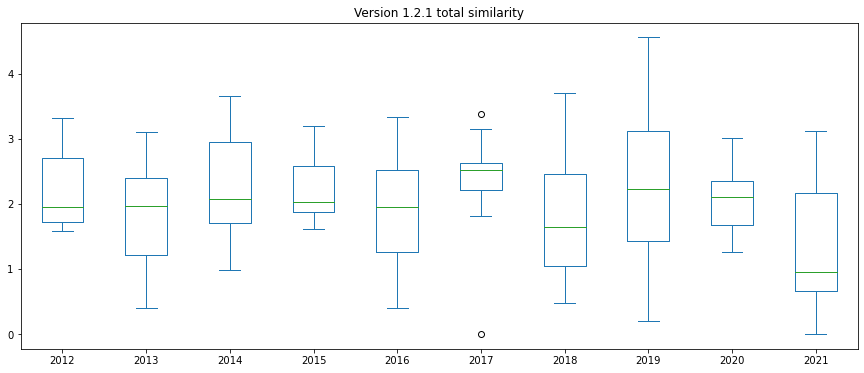

In [45]:
df_simplified_add_v1_sentence.plot.box(title = 'Version 1.2.1 total similarity', figsize = (15, 6))

## Version 1.2.2 No weight for any chord; Progression as unit; Chord simplification

In [46]:
simplified_dict_combine_copy = copy.deepcopy(progression_dict_combine)
simplified_dict_combine = {} #simplified progression group dictionary
for key in simplified_dict_combine_copy:
    year_song_list = []
    year_song = simplified_dict_combine_copy.get(key)   
    for chord_list in year_song:
        simplified_list = chord_progression_simplification(chord_list)    
        year_song_list.append(simplified_list)
    simplified_dict_combine[key] = year_song_list

In [47]:
simplified_similarity_whole_v1_progression = {}
simplified_similarity_add_v1_progression = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0, 0)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0, 0)    
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    simplified_similarity_add_v1_progression[str(year)]=list(map(lambda x:x[0]+x[1],zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v1_progression[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v1_progression[str(year)+'chorus'] =  chorus_similarity_index

In [48]:
df_simplified_whole_v1_progression = pd.DataFrame(columns = simplified_similarity_whole_v1_progression.keys(), index=list(range(11)))
for i in simplified_similarity_whole_v1_progression.keys():
    for j in range(0, len(simplified_similarity_whole_v1_progression[i])):
        df_simplified_whole_v1_progression[i][j] = simplified_similarity_whole_v1_progression[i][j]    
df_simplified_whole_v1_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.50327,1.72651,1.230844,1.171067,1.146743,1.279031,1.846597,0.984447,1.346339,0.0,2.458612,2.232503,0.799323,0.759098,2.826467,3.16564,1.485671,1.337832,0.208315,0.431182
1,1.943279,1.722558,0.855238,0.445627,0.727063,1.101134,1.130261,0.984447,1.997448,1.997448,1.880543,1.341685,0.539925,0.846343,0.529297,0.241812,1.0762,1.488205,0.412316,0.0
2,0.762216,1.132007,1.833745,1.694193,1.123228,1.505586,1.40281,1.029143,2.004461,2.004461,1.563661,1.471995,0.0,2.037634,1.493587,1.456662,1.466713,1.845346,0.894738,0.952423
3,0.914352,1.407149,0.980382,0.445627,1.95934,1.101134,1.157622,0.935796,1.905909,1.588192,1.528212,1.218487,1.883609,1.814534,1.435669,1.484581,1.930783,0.957262,1.068021,1.068021
4,0.898154,1.239039,0.855238,1.352771,0.727063,1.363443,1.130261,0.935796,1.167143,1.836218,1.317351,1.769253,1.237113,1.877564,1.514321,1.332617,0.896829,1.332767,1.692287,1.755325
5,0.762216,1.205524,1.087156,1.275644,2.322538,1.511753,1.724076,1.205336,1.33253,1.588192,1.317351,1.769253,0.0,0.759098,1.435669,1.678591,0.896829,0.985581,2.026063,1.705559
6,1.586797,1.432214,1.380835,1.300246,2.35492,2.354771,1.779058,1.639334,0.608554,0.388368,1.845542,1.634456,2.302426,1.950795,1.618445,1.985155,1.331164,1.824171,0.877745,0.974042
7,2.011141,2.000686,1.546291,0.63254,1.037194,1.358267,1.358561,1.94821,1.377457,1.1357,1.604568,0.783338,1.099508,0.431182,1.493587,2.968063,1.415023,1.719733,1.060482,1.068021
8,0.925479,1.132007,1.230844,1.300246,1.118324,1.378087,1.358561,1.470714,1.377457,1.1357,1.458386,0.783338,1.39151,0.388368,0.529297,0.241812,0.95743,1.353822,1.207251,0.938839
9,1.304037,1.239039,1.762736,2.378141,1.792354,1.279031,1.312627,1.093644,0.608554,0.0,1.563661,1.67438,1.1949,0.388368,1.53123,1.018349,1.0762,0.957262,0.208315,1.240934


In [49]:
df_simplified_add_v1_progression = pd.DataFrame(columns = simplified_similarity_add_v1_progression.keys(), index=list(range(11)))
for i in simplified_similarity_add_v1_progression.keys():
    for j in range(0, len(simplified_similarity_add_v1_progression[i])):
        df_simplified_add_v1_progression[i][j] = simplified_similarity_add_v1_progression[i][j]    
df_simplified_add_v1_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.22978,2.401911,2.425773,2.831044,1.346339,4.691115,1.558422,5.992106,2.823502,0.639498
1,3.665837,1.300865,1.828197,2.114707,3.994895,3.222228,1.386268,0.771109,2.564405,0.412316
2,1.894223,3.527938,2.628814,2.431953,4.008922,3.035656,2.037634,2.95025,3.312059,1.84716
3,2.321501,1.426009,3.060474,2.093418,3.494101,2.7467,3.698143,2.920249,2.888045,2.136042
4,2.137193,2.208009,2.090506,2.066057,3.003361,3.086605,3.114678,2.846938,2.229596,3.447612
5,1.96774,2.362801,3.834291,2.929412,2.920722,3.086605,0.759098,3.11426,1.88241,3.731622
6,3.019011,2.681082,4.709691,3.418392,0.996922,3.479998,4.253221,3.6036,3.155335,1.851787
7,4.011827,2.178831,2.395461,3.306771,2.513157,2.387906,1.53069,4.46165,3.134756,2.128503
8,2.057487,2.53109,2.496411,2.829275,2.513157,2.241723,1.779877,0.771109,2.311252,2.146089
9,2.543076,4.140877,3.071385,2.406271,0.608554,3.238041,1.583268,2.549579,2.033462,1.44925


<AxesSubplot:title={'center':'Version 1.2.2 verse similarity'}>

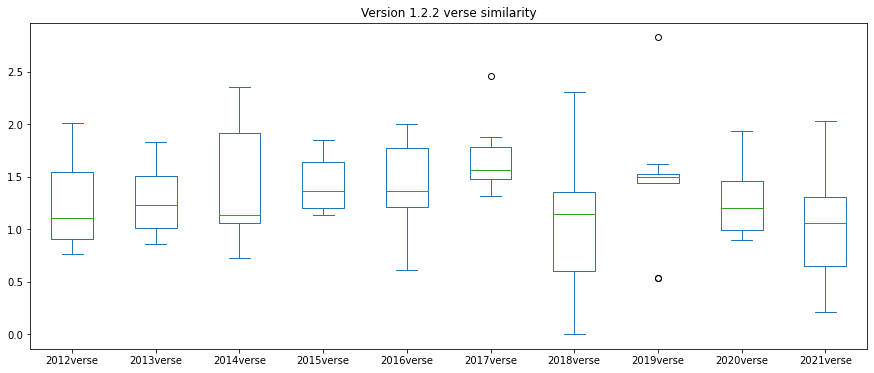

In [50]:
df_simplified_verse_whole_v1_progression=df_simplified_whole_v1_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v1_progression.plot.box(title = 'Version 1.2.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.2 chorus similarity'}>

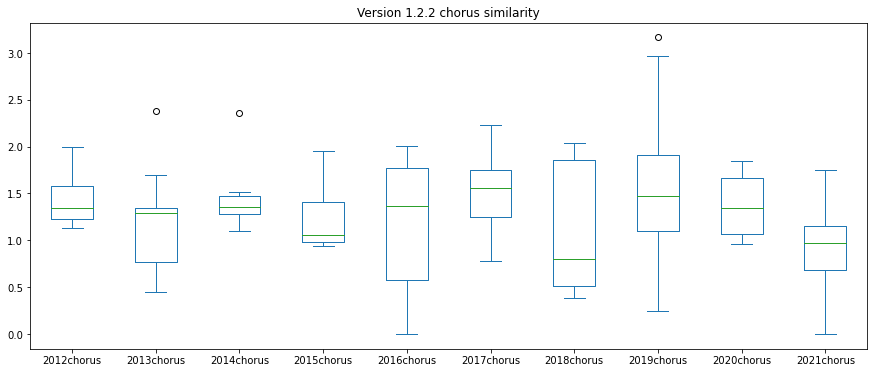

In [51]:
df_simplified_chorus_v1_progression=df_simplified_whole_v1_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v1_progression.plot.box(title = 'Version 1.2.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.2.2 total similarity'}>

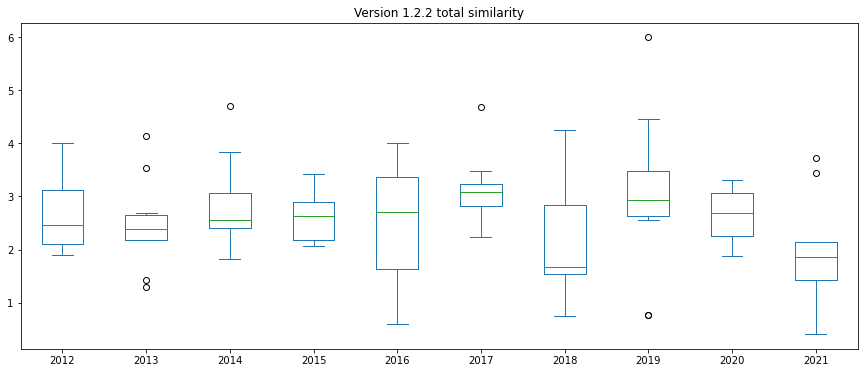

In [52]:
df_simplified_add_v1_progression.plot.box(title = 'Version 1.2.2 total similarity', figsize = (15, 6))

## Version 1.3.1: No weight for any chord; Sentence as unit; Root transition

In [53]:
similarity_dict_whole_v3_sentence = {}
similarity_dict_add_v3_sentence = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:               
                verse_similarity_matrix[i][j] = root_similarity_index_v1(verse[i], verse[j], 0, 0)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v1(chorus[i], chorus[j], 0, 0)[0]
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    similarity_dict_add_v3_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v3_sentence[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v3_sentence[str(year)+'chorus'] =  chorus_similarity_index

In [54]:
df_index_whole_v3_sentence = pd.DataFrame(columns = similarity_dict_whole_v3_sentence.keys(), index=list(range(11)))
for i in similarity_dict_whole_v3_sentence.keys():
    for j in range(0, len(similarity_dict_whole_v3_sentence[i])):
        df_index_whole_v3_sentence[i][j] = similarity_dict_whole_v3_sentence[i][j]    
df_index_whole_v3_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.015314,2.224745,1.547787,0.0,1.190222,1.374369,1.878223,0.62361,1.376871,1.790569,1.358229,1.441592,0.866025,1.440106,1.908067,1.817972,1.286566,1.06066,0.395285,0.57735
1,1.248838,1.956943,0.790569,0.0,1.196923,0.866025,1.446737,0.62361,2.349628,2.44949,2.0,1.581139,1.118034,0.866025,0.935414,0.0,0.790569,0.967707,0.0,0.0
2,0.879653,2.0,0.790569,0.0,1.322706,1.785489,1.762165,1.761199,1.933382,2.04044,1.666333,1.224745,0.0,2.12132,1.802776,1.581139,2.340549,1.870829,0.395285,0.527046
3,1.755075,1.06066,0.790569,0.0,1.802776,1.751911,2.04044,1.771063,1.990067,1.926686,1.319479,1.414214,2.076072,2.272448,1.658312,1.9016,1.06066,1.095014,0.866025,0.866025
4,1.112191,0.57735,1.172604,1.244017,0.527046,0.730224,2.003469,2.063716,0.748838,1.06066,1.059862,1.47457,1.247219,2.274755,1.681747,1.935414,1.393322,0.866025,1.870829,1.992575
5,1.351591,1.866025,1.849753,1.732051,1.581139,1.691957,2.000369,1.631443,0.0,2.236068,1.868424,1.414214,0.0,1.224745,1.414214,1.270502,0.790569,0.707107,1.862181,1.870829
6,0.942809,0.790569,1.422818,1.732051,1.581139,1.118034,0.527046,1.581139,0.0,0.790569,1.658312,2.061553,2.187081,1.85123,2.140113,1.990254,2.24975,1.870829,1.688165,1.469855
7,1.547787,1.678867,1.866025,1.274755,1.104397,1.5,1.414214,1.929654,2.06066,2.0,1.224745,1.66515,1.150656,0.0,1.658312,1.455705,1.469855,1.373773,0.0,0.0
8,1.581139,0.935414,1.926686,1.224745,0.790569,0.90072,1.520159,0.527046,2.0,2.0,1.825512,1.918816,1.527046,0.790569,0.0,0.353553,2.0,1.216545,2.053448,1.06066
9,1.0,1.761199,1.729004,1.609208,1.414214,0.0,1.642703,1.448403,0.748838,0.790569,0.0,0.0,1.482842,0.57735,1.512645,0.0,1.06066,0.666667,0.395285,0.62361


In [55]:
df_index_add_v3_sentence = pd.DataFrame(columns = similarity_dict_add_v3_sentence.keys(), index=list(range(11)))
for i in similarity_dict_add_v3_sentence.keys():
    for j in range(0, len(similarity_dict_add_v3_sentence[i])):
        df_index_add_v3_sentence[i][j] = similarity_dict_add_v3_sentence[i][j]    
df_index_add_v3_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.240059,1.547787,2.564591,2.501833,3.167441,2.79982,2.306132,3.726038,2.347226,0.972635
1,3.205781,0.790569,2.062949,2.070346,4.799118,3.581139,1.984059,0.935414,1.758277,0.0
2,2.879653,0.790569,3.108195,3.523365,3.973822,2.891078,2.12132,3.383914,4.211377,0.922331
3,2.815735,0.790569,3.554687,3.811503,3.916753,2.733693,4.34852,3.559912,2.155674,1.732051
4,1.689541,2.416621,1.25727,4.067185,1.809498,2.534432,3.521974,3.617161,2.259347,3.863404
5,3.217616,3.581803,3.273096,3.631812,2.236068,3.282637,1.224745,2.684716,1.497676,3.733009
6,1.733378,3.154869,2.699173,2.108185,0.790569,3.719865,4.038311,4.130366,4.120579,3.15802
7,3.226654,3.14078,2.604397,3.343867,4.06066,2.889895,1.150656,3.114018,2.843629,0.0
8,2.516553,3.15143,1.691289,2.047206,4.0,3.744328,2.317616,0.353553,3.216545,3.114109
9,2.761199,3.338213,1.414214,3.091105,1.539408,0.0,2.060193,1.512645,1.727327,1.018894


<AxesSubplot:title={'center':'Version 2.1.1 verse similarity'}>

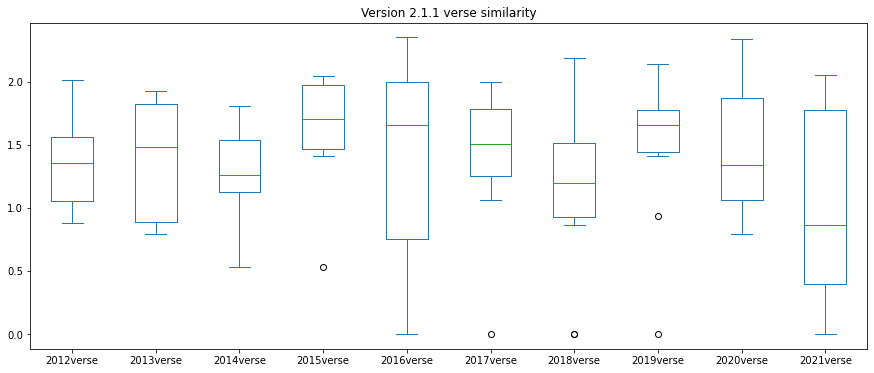

In [56]:
df_index_verse_v3_sentence = df_index_whole_v3_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v3_sentence.plot.box(title = 'Version 1.3.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.1 chorus similarity'}>

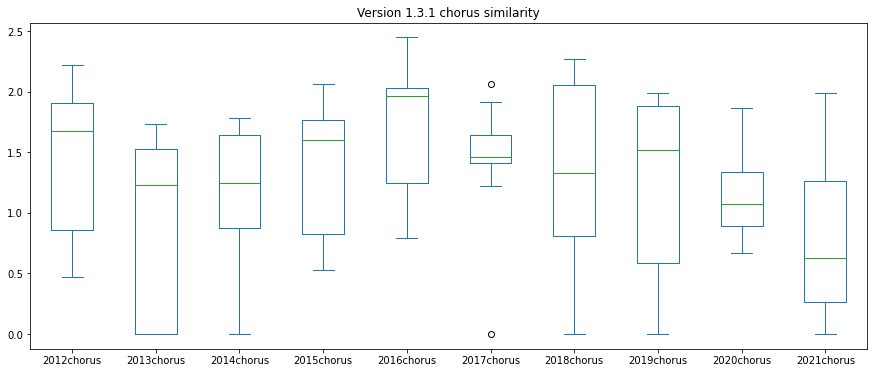

In [57]:
df_index_chorus_v3_sentence = df_index_whole_v3_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v3_sentence.plot.box(title = 'Version 1.3.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.1 total similarity'}>

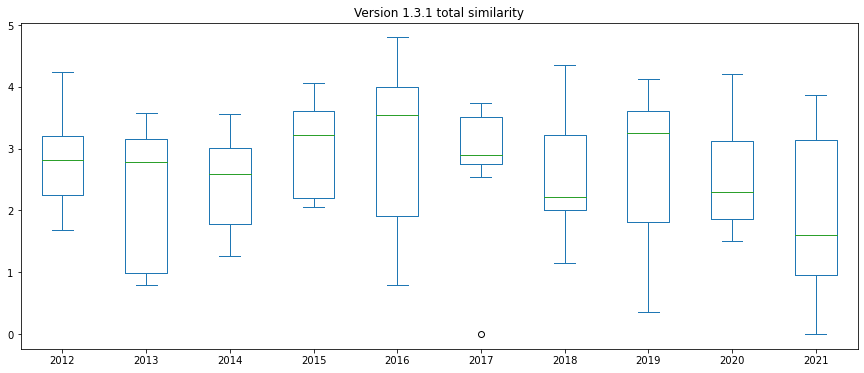

In [58]:
df_index_add_v3_sentence.plot.box(title = 'Version 1.3.1 total similarity', figsize = (15, 6))

## Version 1.3.2: No weight for any chord; Progression as unit; Root transition

In [59]:
similarity_dict_whole_v3_progression = {}
similarity_dict_add_v3_progression = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = root_similarity_index_v2(verse[i], verse[j], 0, 0)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v2(chorus[i], chorus[j], 0, 0)     
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    similarity_dict_add_v3_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v3_progression[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v3_progression[str(year)+'chorus'] =  chorus_similarity_index

In [60]:
df_index_whole_v3_progression = pd.DataFrame(columns = similarity_dict_whole_v3_progression.keys(), index=list(range(11)))
for i in similarity_dict_whole_v3_progression.keys():
    for j in range(0, len(similarity_dict_whole_v3_progression[i])):
        df_index_whole_v3_progression[i][j] = similarity_dict_whole_v3_progression[i][j]    
df_index_whole_v3_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.0,0.909059,1.354006,1.615893,1.483708,1.226162,1.22899,1.198958,1.154701,0.333333,1.0,1.615893,1.233221,1.322876,1.965854,1.738054,1.787301,1.687371,0.294628,0.552771
1,1.086534,1.312335,0.794949,0.968246,0.903312,0.909059,1.608355,1.256925,1.224745,1.224745,1.236033,1.198958,1.118034,1.57233,0.781736,0.372678,1.037492,1.622327,0.294628,0.0
2,1.271045,1.269296,0.89365,1.054093,1.0425,1.259685,0.914771,1.198958,1.280191,1.280191,1.0,0.799305,0.0,1.354006,1.092906,1.190238,1.224745,1.105542,1.040833,1.040833
3,1.159202,1.404358,0.866025,0.968246,1.119586,1.148671,1.159202,0.740683,1.384437,1.57233,1.236033,0.971825,1.188779,1.178511,1.322876,1.190238,1.596437,1.301708,0.62361,0.62361
4,1.035817,0.740683,0.794949,0.968246,1.0425,1.610512,1.394433,0.740683,1.080123,1.35144,1.508494,1.122683,0.714435,1.092906,1.224745,1.5,1.037492,1.37184,1.414214,1.488381
5,1.705791,1.76973,1.277476,1.277476,0.971825,1.20185,1.891134,1.076904,1.024017,1.322876,1.394433,0.971825,0.0,1.42156,1.596437,2.020726,1.24024,1.516117,0.942809,1.089725
6,1.035817,1.190238,1.114924,1.198958,0.971825,0.833333,1.764818,1.855921,0.944649,0.866025,1.34371,1.200347,1.822887,1.092906,1.224745,1.509231,1.20185,1.105542,1.312335,1.154701
7,1.086534,1.296362,1.213352,0.968246,0.970037,1.174084,1.324187,1.210487,0.968246,1.0,1.320248,1.198958,0.92983,0.552771,1.092906,1.44698,1.789243,1.825742,0.62361,0.62361
8,1.0,0.719278,1.403122,1.263922,0.903312,0.909059,1.704773,1.707825,0.968246,1.0,1.320248,1.122683,0.714435,0.866025,0.781736,0.687184,1.20185,1.687371,1.414214,1.37032
9,1.451771,1.404358,0.89365,0.968246,1.305703,0.833333,0.914771,1.210487,0.944649,0.333333,1.404358,0.799305,0.92983,0.552771,0.942809,0.372678,1.5,1.452966,1.224745,0.600925


In [61]:
df_index_add_v3_progression = pd.DataFrame(columns = similarity_dict_add_v3_progression.keys(), index=list(range(11)))
for i in similarity_dict_add_v3_progression.keys():
    for j in range(0, len(similarity_dict_add_v3_progression[i])):
        df_index_add_v3_progression[i][j] = similarity_dict_add_v3_progression[i][j]    
df_index_add_v3_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1.909059,2.9699,2.709869,2.427948,1.488034,2.615893,2.556096,3.703909,3.474672,0.847399
1,2.398868,1.763195,1.812371,2.86528,2.44949,2.434991,2.690364,1.154414,2.659818,0.294628
2,2.540341,1.947743,2.302184,2.113729,2.560382,1.799305,1.354006,2.283144,2.330286,2.081666
3,2.563561,1.834271,2.268256,1.899885,2.956767,2.207858,2.36729,2.513114,2.898145,1.247219
4,1.7765,1.763195,2.653012,2.135116,2.431563,2.631177,1.807341,2.724745,2.409331,2.902594
5,3.475521,2.554952,2.173676,2.968038,2.346893,2.366259,1.42156,3.617163,2.756357,2.032534
6,2.226055,2.313882,1.805159,3.62074,1.810674,2.544057,2.915793,2.733976,2.307392,2.467035
7,2.382896,2.181597,2.144121,2.534674,1.968246,2.519206,1.482601,2.539886,3.614984,1.247219
8,1.719278,2.667044,1.812371,3.412598,1.968246,2.442931,1.58046,1.46892,2.889222,2.784534
9,2.856129,1.861896,2.139037,2.125257,1.277982,2.203664,1.482601,1.315487,2.952966,1.82567


<AxesSubplot:title={'center':'Version 1.3.2 verse similarity'}>

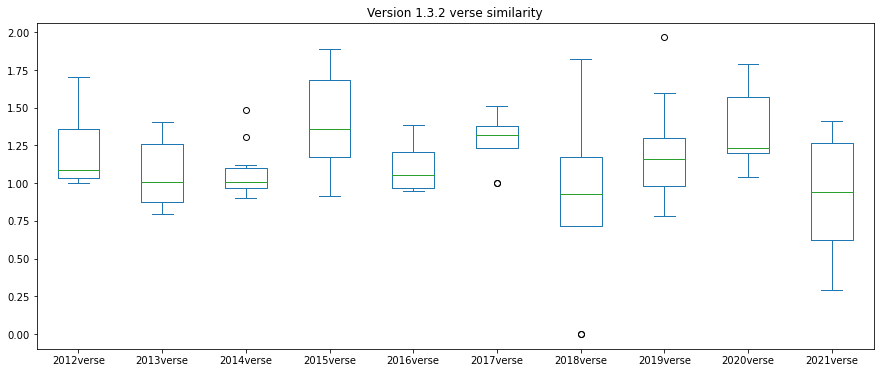

In [62]:
df_index_verse_v3_progression = df_index_whole_v3_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v3_progression.plot.box(title = 'Version 1.3.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.2 chorus similarity'}>

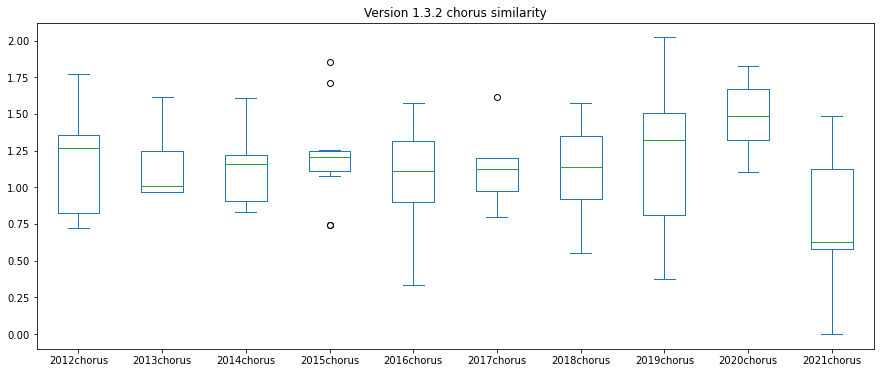

In [63]:
df_index_chorus_v3_progression = df_index_whole_v3_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v3_progression.plot.box(title = 'Version 1.3.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 1.3.2 total similarity'}>

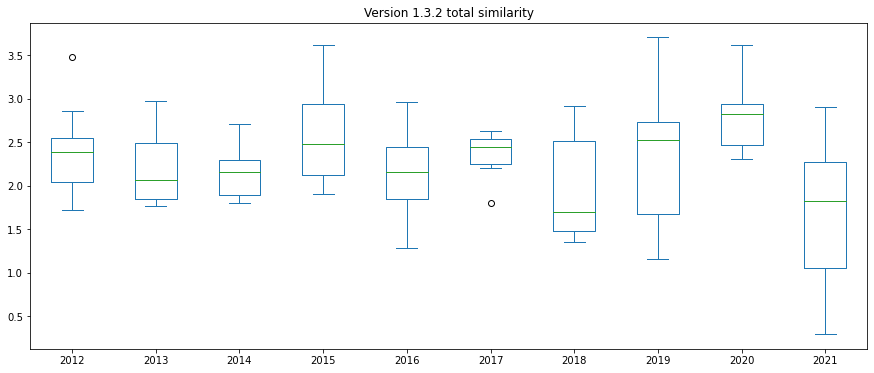

In [64]:
df_index_add_v3_progression.plot.box(title = 'Version 1.3.2 total similarity', figsize = (15, 6))

## Version 2.1.1: First chord weights heavier; Sentence as unit; No chord simplification

In [65]:
similarity_dict_whole_v2_sentence = {}
similarity_dict_add_v2_sentence = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:               
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0.5, 0.5)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0.5, 0.5)[0]
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    similarity_dict_add_v2_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v2_sentence[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v2_sentence[str(year)+'chorus'] =  chorus_similarity_index

In [66]:
df_index_whole_v2_sentence = pd.DataFrame(columns = similarity_dict_whole_v2_sentence.keys(), index=list(range(11)))
for i in similarity_dict_whole_v2_sentence.keys():
    for j in range(0, len(similarity_dict_whole_v2_sentence[i])):
        df_index_whole_v2_sentence[i][j] = similarity_dict_whole_v2_sentence[i][j]    
df_index_whole_v2_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.394295,1.623819,0.872363,0.544016,1.070335,1.068061,1.547104,1.091076,1.591804,1.591804,1.501696,1.58693,0.483486,0.59402,1.99599,2.416527,1.615055,1.454167,0.598188,0.965667
1,1.315696,1.429602,1.651312,1.112892,0.944199,1.098041,1.257828,1.183096,1.786148,1.773061,1.774167,0.949878,0.576667,0.577624,0.985071,0.537492,1.182254,0.816268,0.3891,0.0
2,1.068389,0.933733,1.445586,0.979357,1.095314,1.251861,1.359773,1.202744,1.572513,1.572513,1.9262,1.864491,0.673892,2.010229,1.064822,1.297998,1.261721,1.461823,0.622952,0.432878
3,1.252443,0.904822,1.069717,0.544016,1.580345,1.320963,1.380911,1.242704,1.256257,1.256257,1.408095,1.196681,1.837435,1.764043,1.271037,1.401745,1.324587,1.644146,1.067495,1.057474
4,1.219597,0.740503,1.681438,1.741066,0.90418,0.968573,1.375437,1.272747,0.816307,1.014909,1.225788,1.139458,1.186414,1.740717,1.109406,1.180536,1.129588,1.165258,1.477506,1.601904
5,1.399556,0.643685,1.041533,1.399405,1.556641,1.539628,1.370029,1.194077,0.801196,1.455784,1.308599,1.196681,0.560908,0.533154,0.743502,1.097825,0.651081,1.008807,1.067495,1.359607
6,1.735627,0.643257,1.004554,1.602978,1.634506,1.914268,0.685808,1.362945,0.960279,1.016423,1.587076,1.669566,2.165459,1.464801,1.747159,1.546628,1.346173,1.437559,1.186531,1.025215
7,1.800445,1.72882,1.124628,1.087302,1.065097,1.077408,1.360407,1.727477,1.241766,0.990623,1.357238,1.359431,1.249519,0.371092,1.064822,2.270131,1.155899,1.335182,1.012026,0.789276
8,0.985392,0.620697,1.566162,1.496051,0.762863,1.068636,1.42701,1.170763,0.990623,0.990623,1.399492,1.35204,1.570817,0.693021,0.537492,0.589314,1.276906,0.90947,1.475835,0.806646
9,1.369539,1.102002,1.413924,2.026593,1.246423,1.068061,1.028423,1.162337,1.162349,1.073293,1.378101,1.24531,1.326465,0.724968,1.34137,0.161248,0.912136,0.918978,0.438824,0.887697


In [67]:
df_index_add_v2_sentence = pd.DataFrame(columns = similarity_dict_add_v2_sentence.keys(), index=list(range(11)))
for i in similarity_dict_add_v2_sentence.keys():
    for j in range(0, len(similarity_dict_add_v2_sentence[i])):
        df_index_add_v2_sentence[i][j] = similarity_dict_add_v2_sentence[i][j]    
df_index_add_v2_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.018113,1.416379,2.138396,2.638181,3.183608,3.088626,1.077506,4.412517,3.069222,1.563855
1,2.745298,2.764204,2.04224,2.440924,3.559209,2.724045,1.154291,1.522562,1.998522,0.3891
2,2.002122,2.424943,2.347175,2.562516,3.145026,3.79069,2.684122,2.36282,2.723544,1.05583
3,2.157265,1.613734,2.901307,2.623615,2.512515,2.604777,3.601478,2.672782,2.968734,2.124969
4,1.9601,3.422504,1.872754,2.648184,1.831216,2.365246,2.927132,2.289942,2.294846,3.07941
5,2.04324,2.440938,3.096269,2.564106,2.25698,2.50528,1.094062,1.841327,1.659888,2.427102
6,2.378884,2.607532,3.548774,2.048754,1.976702,3.256641,3.63026,3.293786,2.783733,2.211746
7,3.529265,2.21193,2.142505,3.087884,2.232389,2.716669,1.620611,3.334953,2.491081,1.801302
8,1.606089,3.062212,1.831498,2.597772,1.981246,2.751532,2.263837,1.126806,2.186376,2.282481
9,2.471541,3.440517,2.314484,2.190759,2.235643,2.623411,2.051433,1.502618,1.831114,1.326522


<AxesSubplot:title={'center':'Version 2.1.1 verse similarity'}>

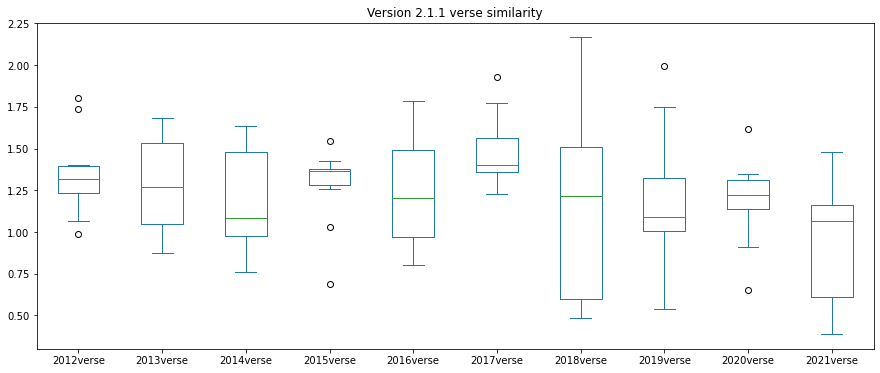

In [68]:
df_index_verse_v2_sentence = df_index_whole_v2_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v2_sentence.plot.box(title = 'Version 2.1.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.1 chorus similarity'}>

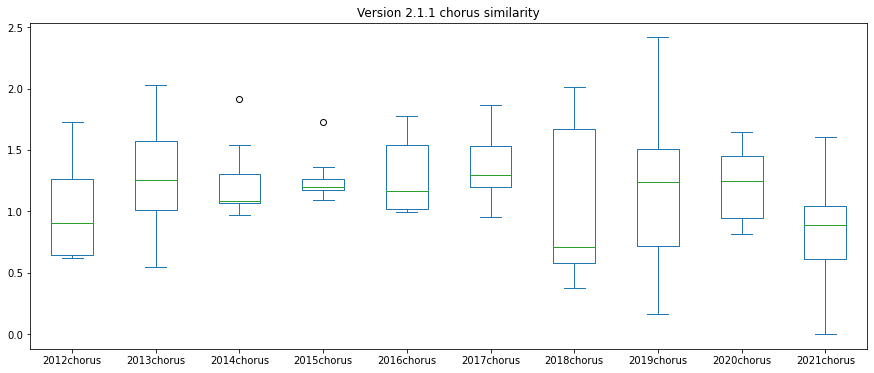

In [69]:
df_index_chorus_v2_sentence = df_index_whole_v2_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v2_sentence.plot.box(title = 'Version 2.1.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.1 total similarity'}>

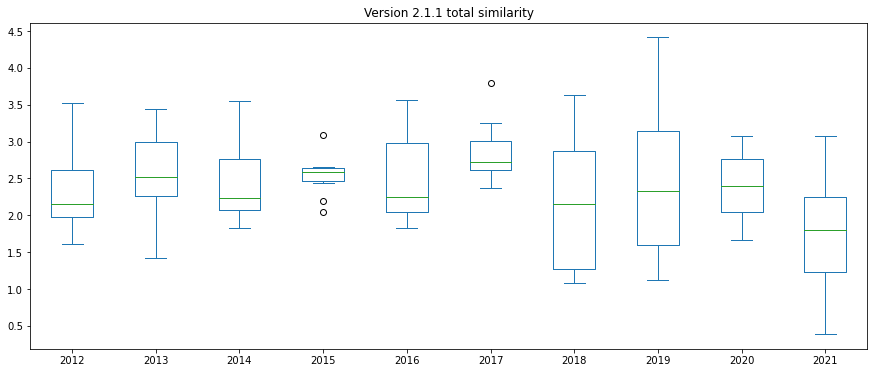

In [70]:
df_index_add_v2_sentence.plot.box(title = 'Version 2.1.1 total similarity', figsize = (15, 6))

## Version 2.1.2: First chord weights heavier; Progression as unit; No chord simplification

In [71]:
similarity_dict_whole_v2_progression = {}
similarity_dict_add_v2_progression = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0.5, 0.5)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0.5, 0.5)     
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    similarity_dict_add_v2_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    similarity_dict_whole_v2_progression[str(year)+'verse'] =  verse_similarity_index
    similarity_dict_whole_v2_progression[str(year)+'chorus'] =  chorus_similarity_index

In [72]:
df_index_whole_v2_progression = pd.DataFrame(columns = similarity_dict_whole_v2_progression.keys(), index=list(range(11)))
for i in similarity_dict_whole_v2_progression.keys():
    for j in range(0, len(similarity_dict_whole_v2_progression[i])):
        df_index_whole_v2_progression[i][j] = similarity_dict_whole_v2_progression[i][j]    
df_index_whole_v2_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.476108,1.642167,1.060896,0.65113,1.155301,1.12381,1.847215,1.418171,2.200754,1.65683,1.924364,1.704107,0.634652,0.675005,2.795373,3.221174,1.810759,1.278876,0.419207,1.348705
1,1.865088,1.438773,1.763721,1.25702,1.040308,1.472502,1.060658,1.418171,2.027935,2.027935,1.921631,1.343586,0.534208,0.855326,0.689032,0.42046,0.949769,1.432586,0.228135,0.0
2,0.815894,1.09513,1.860273,1.68647,1.06476,1.606244,1.617509,0.936599,2.084464,2.179411,2.271614,2.172624,0.513469,2.033446,1.564943,1.533395,1.353562,1.625875,0.913027,0.962442
3,0.72535,1.176972,1.189583,0.65113,1.863986,1.812595,1.145512,1.257999,1.196589,1.240778,1.691551,1.181098,1.904534,1.859744,1.25892,1.596624,1.722828,1.801851,1.313254,1.452475
4,1.015867,1.304254,2.146343,2.17939,0.984475,1.359073,1.060658,0.936599,1.049359,1.920627,1.273399,1.62979,1.54345,1.891897,1.470788,1.421998,0.994646,1.151699,1.643764,1.623451
5,0.72535,1.09513,1.189583,1.792444,2.120305,1.487317,1.706318,1.358578,1.332709,1.696344,1.273399,1.62979,0.513469,0.675005,1.25892,1.661433,0.857817,0.944711,1.313254,1.631392
6,1.600251,1.45516,1.15026,1.402954,2.375411,2.147808,1.726391,1.351943,1.096262,1.388304,1.767038,1.671045,2.49843,1.724951,1.579724,1.87472,1.343751,1.57574,1.288907,1.2892
7,2.077889,2.016304,1.538021,1.114447,1.061655,1.472502,1.437135,1.855057,1.410207,1.190777,1.6205,0.918234,1.150936,0.514168,1.52598,2.755753,1.110712,1.523657,1.030285,0.950764
8,0.856692,1.402937,1.060896,1.314066,0.984475,1.443677,1.49478,1.358578,1.410207,1.190777,1.365421,0.918234,1.534147,0.514168,0.689032,0.42046,0.857817,1.250174,1.140954,0.998924
9,1.259061,1.304254,1.896456,2.395905,1.181485,1.12381,1.379349,1.11958,1.049359,1.240778,1.365421,1.505144,1.440074,1.215711,1.532264,1.014802,0.949769,0.944711,0.228135,0.950764


In [73]:
df_index_add_v2_progression = pd.DataFrame(columns = similarity_dict_add_v2_progression.keys(), index=list(range(11)))
for i in similarity_dict_add_v2_progression.keys():
    for j in range(0, len(similarity_dict_add_v2_progression[i])):
        df_index_add_v2_progression[i][j] = similarity_dict_add_v2_progression[i][j]    
df_index_add_v2_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.118275,1.712026,2.279111,3.265386,3.857583,3.628471,1.309657,6.016547,3.089635,1.767912
1,3.303861,3.020741,2.51281,2.47883,4.05587,3.265217,1.389534,1.109492,2.382355,0.228135
2,1.911024,3.546743,2.671005,2.554108,4.263875,4.444238,2.546915,3.098338,2.979437,1.875469
3,1.902322,1.840713,3.676581,2.40351,2.437367,2.872649,3.764278,2.855543,3.524679,2.765729
4,2.320122,4.325733,2.343548,1.997257,2.969987,2.903189,3.435347,2.892786,2.146346,3.267215
5,1.82048,2.982027,3.607623,3.064896,3.029053,2.903189,1.188474,2.920353,1.802528,2.944646
6,3.055411,2.553214,4.52322,3.078334,2.484567,3.438083,4.22338,3.454444,2.91949,2.578107
7,4.094193,2.652468,2.534157,3.292192,2.600984,2.538734,1.665104,4.281732,2.634369,1.981049
8,2.259629,2.374963,2.428152,2.853358,2.600984,2.283656,2.048315,1.109492,2.107991,2.139878
9,2.563316,4.292361,2.305295,2.498929,2.290138,2.870565,2.655785,2.547066,1.894479,1.178899


<AxesSubplot:title={'center':'Version 2.1.2 verse similarity'}>

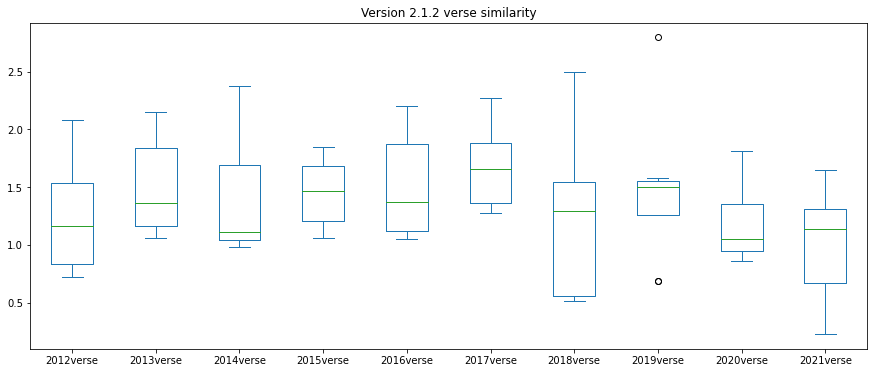

In [74]:
df_index_verse_v2_progression = df_index_whole_v2_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_index_verse_v2_progression.plot.box(title = 'Version 2.1.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.2 chorus similarity'}>

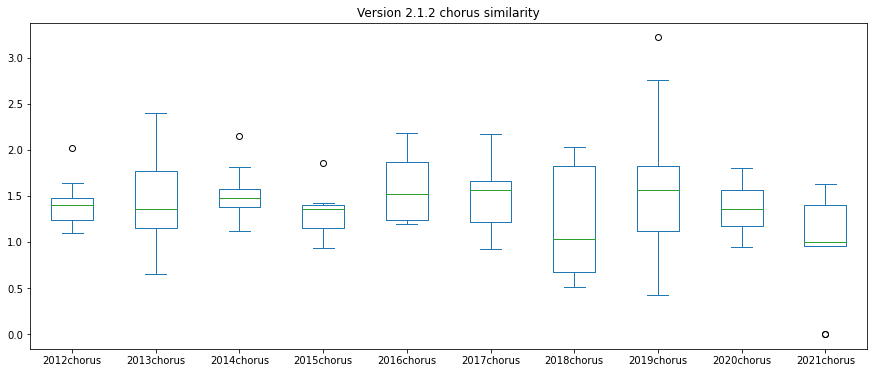

In [75]:
df_index_chorus_v2_progression = df_index_whole_v2_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_index_chorus_v2_progression.plot.box(title = 'Version 2.1.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.1.2 total similarity'}>

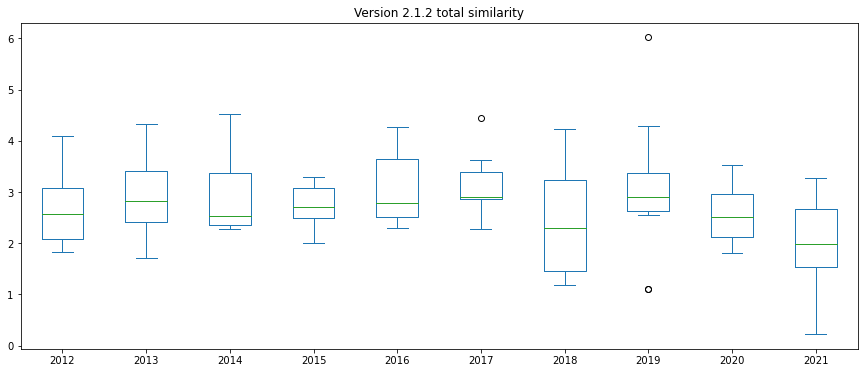

In [76]:
df_index_add_v2_progression.plot.box(title = 'Version 2.1.2 total similarity', figsize = (15, 6))

## Version 2.2.1: First chord weights heavier; Sentence as unit; Chord simplification

In [77]:
simplified_similarity_whole_v2_sentence = {}
simplified_similarity_add_v2_sentence = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v1(verse[i], verse[j], 0.5, 0.5)[0]             
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v1(chorus[i], chorus[j], 0.5, 0.5)[0]
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    simplified_similarity_add_v2_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v2_sentence[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v2_sentence[str(year)+'chorus'] =  chorus_similarity_index

In [78]:
df_simplified_whole_v2_sentence = pd.DataFrame(columns = simplified_similarity_whole_v2_sentence.keys(), index=list(range(11)))
for i in simplified_similarity_whole_v2_sentence.keys():
    for j in range(0, len(simplified_similarity_whole_v2_sentence[i])):
        df_simplified_whole_v2_sentence[i][j] = simplified_similarity_whole_v2_sentence[i][j]    
df_simplified_whole_v2_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.429646,1.65082,1.207567,0.0,1.067294,1.375692,1.634865,0.421473,1.133411,0.879901,1.688413,1.670296,0.418922,0.550715,2.182232,2.407149,1.310286,0.891143,0.269021,0.445626
1,1.505422,1.611539,0.359551,0.0,0.832755,0.94822,1.204616,0.495642,1.786148,1.758752,1.717406,0.949878,0.539321,0.643257,0.912758,0.392867,0.643257,0.977221,0.0,0.0
2,0.866939,1.171763,1.158771,0.984216,0.876348,1.114684,1.509547,1.209898,1.432102,1.347204,1.504145,1.200934,0.0,2.02279,1.028848,1.193175,1.366393,1.481039,0.321629,0.428838
3,1.318938,0.643257,0.606332,0.0,1.699859,1.194114,1.380911,1.315354,1.565754,1.378115,1.475728,1.196681,1.848372,1.851912,1.276779,1.408364,0.643257,1.478488,0.462139,0.462139
4,1.220143,0.390799,0.638937,0.78271,0.55181,0.58796,1.375437,1.414889,0.478859,0.643257,1.257391,1.122051,1.069247,1.776042,1.137046,1.221272,1.017299,1.077585,1.534233,1.74482
5,0.995626,0.914181,0.983238,1.079807,1.723917,1.607309,1.215287,1.033302,0.655511,1.426916,1.379128,1.196681,0.0,0.468197,0.98355,1.168962,0.478859,0.877836,1.606079,1.528414
6,1.735627,0.643257,1.101245,1.49286,1.765947,2.015191,0.685808,1.276109,0.0,0.478859,1.518303,1.730192,2.165008,1.343372,1.68315,1.713451,1.366393,1.481039,1.233745,1.13437
7,1.815895,1.72882,1.270819,0.86051,0.97486,0.970185,1.571242,1.745907,1.192023,0.901534,0.899737,0.899737,0.587785,0.0,1.028848,2.350417,1.237191,1.11625,0.0,0.0
8,0.959385,0.620697,1.640626,1.266892,0.448796,0.775216,1.430099,0.653222,0.901534,0.901534,1.308151,1.308151,1.570817,0.478859,0.392867,0.50467,1.378986,0.90947,1.607958,0.643257
9,1.369539,1.102002,1.105864,2.000786,1.683395,1.375692,1.028423,1.194779,0.712695,0.478859,0.308598,0.308598,0.977385,0.445626,1.34137,0.161248,0.643257,0.781647,0.269021,0.428838


In [79]:
df_simplified_add_v2_sentence = pd.DataFrame(columns = simplified_similarity_add_v2_sentence.keys(), index=list(range(11)))
for i in simplified_similarity_add_v2_sentence.keys():
    for j in range(0, len(simplified_similarity_add_v2_sentence[i])):
        df_simplified_add_v2_sentence[i][j] = simplified_similarity_add_v2_sentence[i][j]    
df_simplified_add_v2_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.080467,1.207567,2.442986,2.056338,2.013312,3.358709,0.969638,4.589381,2.20143,0.714646
1,3.116961,0.359551,1.780975,1.700258,3.5449,2.667284,1.182579,1.305625,1.620478,0.0
2,2.038703,2.142987,1.991032,2.719444,2.779305,2.705079,2.02279,2.222024,2.847432,0.750467
3,1.962195,0.606332,2.893973,2.696264,2.943869,2.672409,3.700283,2.685143,2.121745,0.924279
4,1.610941,1.421647,1.13977,2.790326,1.122116,2.379443,2.845289,2.358318,2.094884,3.279053
5,1.909807,2.063045,3.331226,2.248589,2.082427,2.57581,0.468197,2.152512,1.356695,3.134492
6,2.378884,2.594105,3.781138,1.961918,0.478859,3.248495,3.50838,3.3966,2.847432,2.368115
7,3.544715,2.131329,1.945045,3.317148,2.093556,1.799474,0.587785,3.379265,2.353441,0.0
8,1.580082,2.907518,1.224012,2.083321,1.803068,2.616302,2.049676,0.897537,2.288456,2.251215
9,2.471541,3.10665,3.059087,2.223202,1.191554,0.617196,1.423011,1.502618,1.424904,0.697859


<AxesSubplot:title={'center':'Version 2.2.1 verse similarity'}>

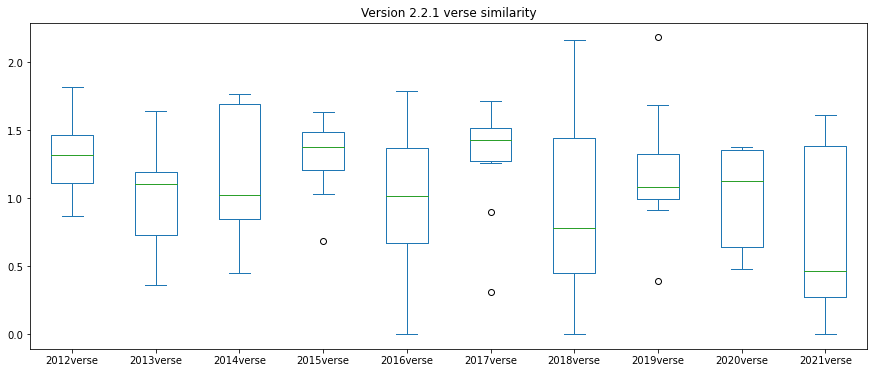

In [80]:
df_simplified_verse_whole_v2_sentence = df_simplified_whole_v2_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v2_sentence.plot.box(title = 'Version 2.2.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.1 chorus similarity'}>

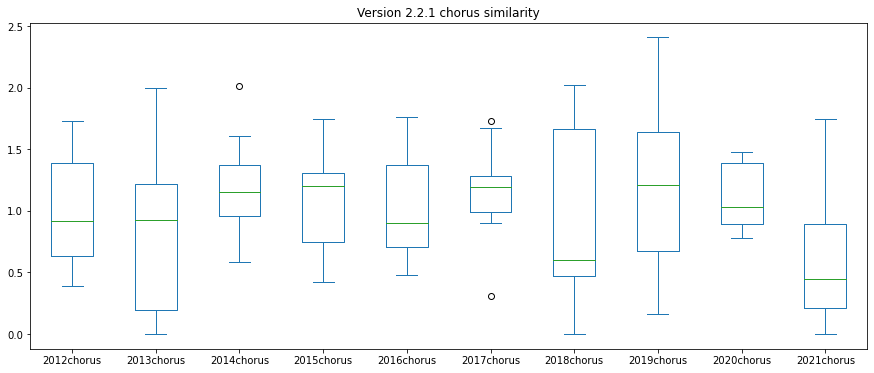

In [81]:
df_simplified_chorus_v2_sentence = df_simplified_whole_v2_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v2_sentence.plot.box(title = 'Version 2.2.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.1 total similarity'}>

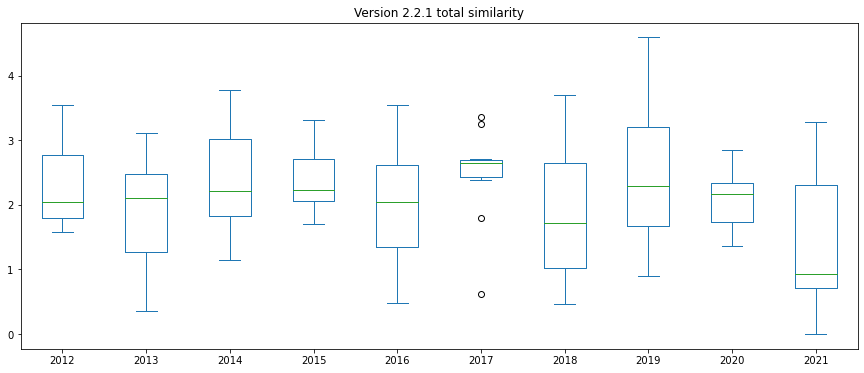

In [82]:
df_simplified_add_v2_sentence.plot.box(title = 'Version 2.2.1 total similarity', figsize = (15, 6))

## Version 2.2.2: First chord weights heavier; Progression as unit; Chord simplification

In [83]:
simplified_similarity_whole_v2_progression = {}
simplified_similarity_add_v2_progression = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(simplified_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(simplified_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = similarity_index_v2(verse[i], verse[j], 0.5, 0.5)   
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = similarity_index_v2(chorus[i], chorus[j], 0.5, 0.5)   
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    simplified_similarity_add_v2_progression[str(year)]=list(map(lambda x:x[0]+x[1],zip(verse_similarity_index,chorus_similarity_index)))
    simplified_similarity_whole_v2_progression[str(year)+'verse'] =  verse_similarity_index
    simplified_similarity_whole_v2_progression[str(year)+'chorus'] =  chorus_similarity_index

In [84]:
df_simplified_whole_v2_progression = pd.DataFrame(columns = simplified_similarity_whole_v2_progression.keys(), index=list(range(11)))
for i in simplified_similarity_whole_v2_progression.keys():
    for j in range(0, len(simplified_similarity_whole_v2_progression[i])):
        df_simplified_whole_v2_progression[i][j] = simplified_similarity_whole_v2_progression[i][j]    
df_simplified_whole_v2_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,1.48226,1.71747,1.252408,1.154253,1.155301,1.300505,1.847215,0.980918,1.400411,0.123263,2.470409,2.232462,0.767609,0.739126,2.83774,3.172564,1.516804,1.347241,0.202367,0.427485
1,2.017272,1.769013,0.848748,0.423168,0.712622,1.092478,1.08058,0.980918,2.027935,2.027935,1.901656,1.338751,0.53205,0.824402,0.589939,0.304893,1.064051,1.46695,0.524623,0.0
2,0.733811,1.132485,1.85356,1.657153,1.089326,1.494008,1.400452,1.021123,2.049771,2.008037,1.571598,1.473271,0.0,2.017132,1.503861,1.472193,1.429052,1.856414,0.907346,0.950641
3,0.917064,1.398141,0.975539,0.423168,1.960679,1.092478,1.145512,0.964595,1.945627,1.603104,1.58898,1.219948,1.900495,1.832951,1.453565,1.504266,1.918592,0.941063,1.063969,1.063969
4,0.889714,1.25204,0.848748,1.347195,0.712622,1.346225,1.08058,0.964595,1.183953,1.856489,1.347927,1.769062,1.229143,1.877348,1.499455,1.378696,0.948912,1.327074,1.69434,1.757986
5,0.733811,1.192675,1.088183,1.332131,2.323856,1.528975,1.806402,1.22058,1.378622,1.603104,1.347927,1.769062,0.0,0.739126,1.453565,1.684922,0.925809,0.972763,2.038198,1.72958
6,1.598701,1.431072,1.396547,1.328835,2.365447,2.362328,1.766478,1.651264,0.702307,0.363382,1.841249,1.641281,2.312668,1.949405,1.644736,2.002366,1.364431,1.813649,0.878949,1.037366
7,2.038412,2.016304,1.573479,0.625701,1.034757,1.364249,1.328222,1.960898,1.364031,1.127952,1.620243,0.816064,1.153114,0.427485,1.503861,2.967435,1.465912,1.764532,1.052165,1.063969
8,0.905105,1.132485,1.252408,1.328835,1.155664,1.400221,1.328222,1.446655,1.364031,1.127952,1.446949,0.816064,1.40631,0.363382,0.589939,0.304893,0.925809,1.337996,1.19761,0.927074
9,1.295618,1.25204,1.752095,2.34989,1.848656,1.300505,1.342277,1.076926,0.702307,0.123263,1.571598,1.682406,1.197205,0.363382,1.532264,1.014802,1.064051,0.941063,0.202367,1.240461


In [85]:
df_simplified_add_v2_progression = pd.DataFrame(columns = simplified_similarity_add_v2_progression.keys(), index=list(range(11)))
for i in simplified_similarity_add_v2_progression.keys():
    for j in range(0, len(simplified_similarity_add_v2_progression[i])):
        df_simplified_add_v2_progression[i][j] = simplified_similarity_add_v2_progression[i][j]    
df_simplified_add_v2_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.19973,2.406661,2.455806,2.828133,1.523674,4.702871,1.506735,6.010304,2.864045,0.629852
1,3.786285,1.271917,1.8051,2.061498,4.05587,3.240406,1.356452,0.894832,2.531001,0.524623
2,1.866296,3.510713,2.583333,2.421575,4.057808,3.044869,2.017132,2.976055,3.285467,1.857987
3,2.315205,1.398707,3.053157,2.110107,3.548731,2.808928,3.733446,2.957831,2.859655,2.127939
4,2.141754,2.195944,2.058848,2.045175,3.040442,3.116989,3.106491,2.878151,2.275987,3.452326
5,1.926486,2.420314,3.852831,3.026983,2.981726,3.116989,0.739126,3.138487,1.898572,3.767777
6,3.029773,2.725382,4.727775,3.417742,1.065689,3.48253,4.262074,3.647103,3.17808,1.916316
7,4.054716,2.19918,2.399006,3.28912,2.491983,2.436307,1.580598,4.471297,3.230444,2.116134
8,2.03759,2.581243,2.555885,2.774876,2.491983,2.263012,1.769692,0.894832,2.263806,2.124684
9,2.547659,4.101985,3.14916,2.419202,0.825569,3.254004,1.560588,2.547066,2.005113,1.442829


<AxesSubplot:title={'center':'Version 2.2.2 verse similarity'}>

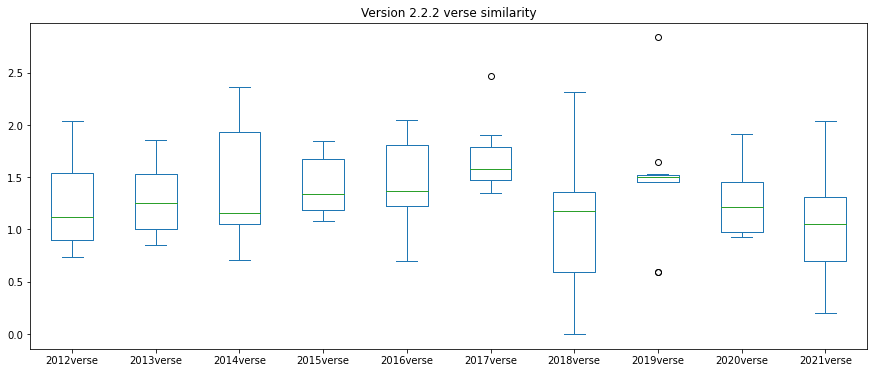

In [86]:
df_simplified_verse_whole_v2_progression=df_simplified_whole_v2_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_simplified_verse_whole_v2_progression.plot.box(title = 'Version 2.2.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.2 chorus similarity'}>

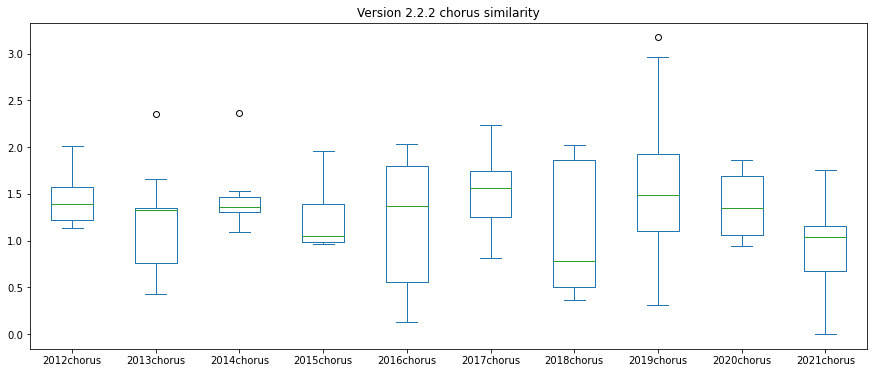

In [87]:
df_simplified_chorus_v2_progression=df_simplified_whole_v2_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                    '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_simplified_chorus_v2_progression.plot.box(title = 'Version 2.2.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.2.2 total similarity'}>

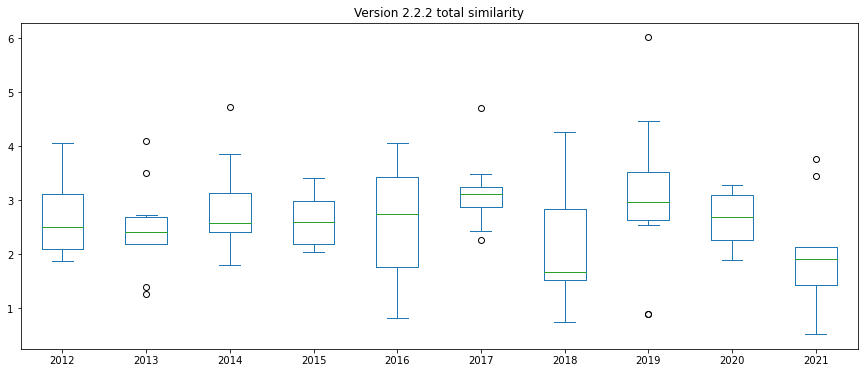

In [88]:
df_simplified_add_v2_progression.plot.box(title = 'Version 2.2.2 total similarity', figsize = (15, 6))

## Version 2.3.1: First chord weights heavier; Sentence as unit; Root transition

In [89]:
root_similarity_dict_whole_v3_sentence = {}
root_similarity_dict_add_v3_sentence = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_sentence[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_sentence[str(year)+'chorus'])
    #verse similarity calculation
    for i in verse: # i songs
        while (['nan'] in i):
            i.pop()
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i==j:
                verse_similarity_matrix[i][j] = float('inf')
            else:               
                verse_similarity_matrix[i][j] = root_similarity_index_v1(verse[i], verse[j], 0.5, 0.5)[0]
    #chorus similarity calculation
    for i in chorus: # i songs
        while (['nan'] in i):
            i.pop()
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i==j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v1(chorus[i], chorus[j], 0.5, 0.5)[0]
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    root_similarity_dict_add_v3_sentence[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    root_similarity_dict_whole_v3_sentence[str(year)+'verse'] =  verse_similarity_index
    root_similarity_dict_whole_v3_sentence[str(year)+'chorus'] =  chorus_similarity_index

In [90]:
df_root_index_whole_v3_sentence = pd.DataFrame(columns = root_similarity_dict_whole_v3_sentence.keys(), index=list(range(11)))
for i in root_similarity_dict_whole_v3_sentence.keys():
    for j in range(0, len(root_similarity_dict_whole_v3_sentence[i])):
        df_root_index_whole_v3_sentence[i][j] = root_similarity_dict_whole_v3_sentence[i][j]    
df_root_index_whole_v3_sentence

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,2.015314,2.224745,1.547787,0.0,1.104397,1.513825,1.870829,0.62361,1.412551,1.790569,1.417584,1.473442,0.866025,1.440106,1.951613,1.855918,1.331936,1.06066,0.395285,0.57735
1,1.298322,1.956943,0.790569,0.0,1.196923,1.06066,1.402942,0.62361,2.366185,2.44949,2.03101,1.620185,1.118034,0.883883,0.883883,0.0,0.864684,1.265505,0.0,0.0
2,0.879653,2.0,0.790569,0.0,1.356854,1.699673,1.773975,1.761199,2.046281,2.070867,1.666333,1.224745,0.0,2.12132,1.837117,1.620185,2.359067,1.767767,0.395285,0.527046
3,1.755075,1.06066,0.790569,0.0,1.837117,1.749102,2.04044,1.771063,1.998346,1.926686,1.362372,1.457738,2.09637,2.272448,1.732051,1.942016,1.06066,1.106052,0.866025,0.866025
4,1.216995,0.57735,1.172604,1.244017,0.527046,0.586302,1.996075,2.063716,0.770285,1.06066,1.214983,1.510181,1.440352,2.274755,1.789098,1.951972,1.44084,0.866025,1.870829,2.04561
5,1.418677,1.870829,1.883933,1.767767,1.658312,1.77482,1.974604,1.631443,0.176777,2.263846,1.878106,1.457738,0.0,1.224745,1.541104,1.262169,0.790569,0.707107,1.80144,1.870829
6,1.080123,0.883883,1.443169,1.767767,1.695182,1.3087,0.527046,1.581139,0.0,0.790569,1.732051,1.968502,2.17913,1.89454,2.190307,2.015807,2.285405,1.767767,1.659078,1.60717
7,1.597014,1.718425,1.866025,1.274755,1.272301,1.579156,1.505042,1.929654,2.075291,2.0,1.274755,1.68911,1.279545,0.0,1.732051,1.484889,1.527046,1.373773,0.0,0.0
8,1.581139,0.935414,1.926686,1.224745,0.790569,1.086426,1.505042,0.527046,2.0,2.0,1.836765,1.96408,1.610477,0.790569,0.0,0.176777,2.0,1.379408,2.067337,1.06066
9,1.0,1.761199,1.761421,1.609208,1.494746,0.353553,1.664116,1.448403,0.780561,0.790569,0.0,0.0,1.447111,0.57735,1.529315,0.0,1.06066,0.666667,0.395285,0.62361


In [91]:
df_root_index_add_v3_sentence = pd.DataFrame(columns = root_similarity_dict_add_v3_sentence.keys(), index=list(range(11)))
for i in root_similarity_dict_add_v3_sentence.keys():
    for j in range(0, len(root_similarity_dict_add_v3_sentence[i])):
        df_root_index_add_v3_sentence[i][j] = root_similarity_dict_add_v3_sentence[i][j]    
df_root_index_add_v3_sentence

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4.240059,1.547787,2.618222,2.494438,3.203121,2.891027,2.306132,3.807531,2.392596,0.972635
1,3.255265,0.790569,2.257584,2.026551,4.815675,3.651195,2.001917,0.883883,2.130189,0.0
2,2.879653,0.790569,3.056527,3.535174,4.117148,2.891078,2.12132,3.457302,4.126834,0.922331
3,2.815735,0.790569,3.586219,3.811503,3.925031,2.82011,4.368818,3.674067,2.166712,1.732051
4,1.794345,2.416621,1.113348,4.05979,1.830945,2.725164,3.715106,3.741069,2.306865,3.916439
5,3.289506,3.6517,3.433133,3.606047,2.440623,3.335844,1.224745,2.803272,1.497676,3.672268
6,1.964007,3.210936,3.003881,2.108185,0.790569,3.700553,4.07367,4.206113,4.053172,3.266248
7,3.315439,3.14078,2.851457,3.434695,4.075291,2.963865,1.279545,3.21694,2.90082,0.0
8,2.516553,3.15143,1.876995,2.032088,4.0,3.800845,2.401047,0.176777,3.379408,3.127998
9,2.761199,3.370629,1.848299,3.112519,1.57113,0.0,2.024462,1.529315,1.727327,1.018894


<AxesSubplot:title={'center':'Version 2.3.1 verse similarity'}>

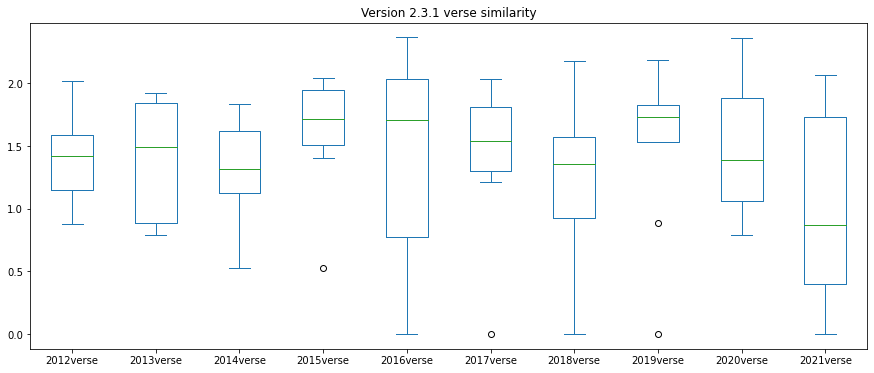

In [92]:
df_root_index_verse_v3_sentence = df_root_index_whole_v3_sentence[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                        '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_root_index_verse_v3_sentence.plot.box(title = 'Version 2.3.1 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.1 chorus similarity'}>

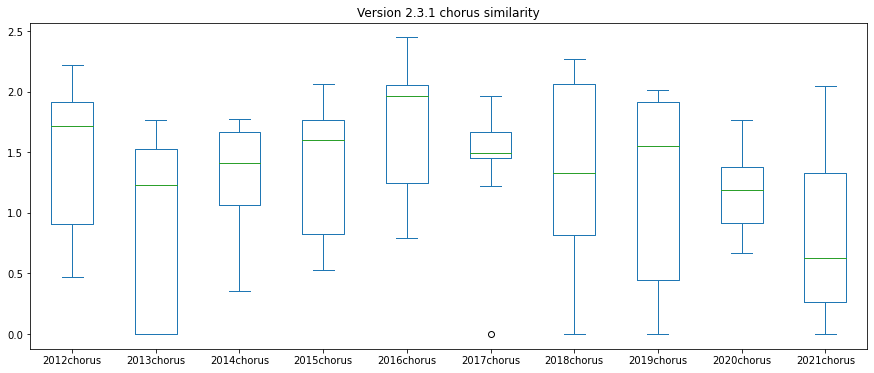

In [93]:
df_root_index_chorus_v3_sentence = df_root_index_whole_v3_sentence[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                        '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_root_index_chorus_v3_sentence.plot.box(title = 'Version 2.3.1 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.1 total similarity'}>

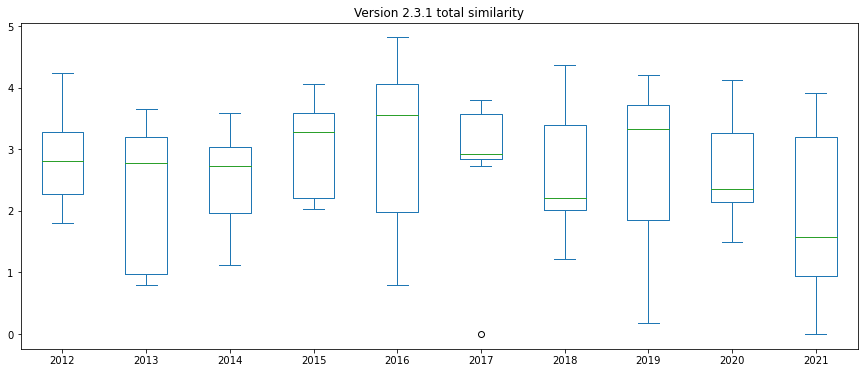

In [94]:
df_root_index_add_v3_sentence.plot.box(title = 'Version 2.3.1 total similarity', figsize = (15, 6))

## Version 2.3.2: First chord weights heavier; Progression as unit; Root transition

In [95]:
root_similarity_dict_whole_v3_progression = {}
root_similarity_dict_add_v3_progression = {}
for year in range(2012, 2022):
    verse_similarity_index, chorus_similarity_index = [], []
    verse = copy.deepcopy(progression_dict_combine[str(year)+'verse'])
    chorus = copy.deepcopy(progression_dict_combine[str(year)+'chorus'])
    #verse similarity calculation
    verse_similarity_matrix = np.zeros((len(verse), len(verse))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(verse)):
        for j in range(0, len(verse)):
            if i == j:
                verse_similarity_matrix[i][j] = float('inf')
            else:
                verse_similarity_matrix[i][j] = root_similarity_index_v2(verse[i], verse[j], 0.5, 0.5)    
    #chorus similarity calculation
    chorus_similarity_matrix = np.zeros((len(chorus), len(chorus))) #compare similarity 2 by 2 and form a matrix
    for i in range(0, len(chorus)):
        for j in range(0, len(chorus)):
            if i == j:
                chorus_similarity_matrix[i][j] = float('inf')
            else:
                chorus_similarity_matrix[i][j] = root_similarity_index_v2(chorus[i], chorus[j], 0.5, 0.5)     
    verse_transpose = verse_similarity_matrix.transpose() 
    chorus_transpose = chorus_similarity_matrix.transpose()  
    for row in verse_transpose:
        verse_similarity_index.append(min(row))
    for row in chorus_transpose:
        chorus_similarity_index.append(min(row))
    root_similarity_dict_add_v3_progression[str(year)] = list(map(lambda x:x[0]+x[1], zip(verse_similarity_index,chorus_similarity_index)))
    root_similarity_dict_whole_v3_progression[str(year)+'verse'] =  verse_similarity_index
    root_similarity_dict_whole_v3_progression[str(year)+'chorus'] =  chorus_similarity_index

In [96]:
df_root_index_whole_v3_progression = pd.DataFrame(columns = root_similarity_dict_whole_v3_progression.keys(), index=list(range(11)))
for i in root_similarity_dict_whole_v3_progression.keys():
    for j in range(0, len(root_similarity_dict_whole_v3_progression[i])):
        df_root_index_whole_v3_progression[i][j] = root_similarity_dict_whole_v3_progression[i][j]    
df_root_index_whole_v3_progression

,2012verse,2012chorus,2013verse,2013chorus,2014verse,2014chorus,2015verse,2015chorus,2016verse,2016chorus,2017verse,2017chorus,2018verse,2018chorus,2019verse,2019chorus,2020verse,2020chorus,2021verse,2021chorus
0,0.881917,0.909059,1.338532,1.615893,1.44638,1.222972,1.176668,1.145644,1.080123,0.235702,1.054093,1.649916,1.233221,1.301708,1.991954,1.721998,1.740051,1.724013,0.402897,0.552771
1,1.160699,1.312335,0.759203,0.968246,0.867528,0.901388,1.586346,1.25658,1.224745,1.224745,1.236033,1.21621,1.013794,1.57233,0.62361,0.372678,1.017213,1.609434,0.402897,0.0
2,1.232207,1.178511,0.759203,0.942809,1.018492,1.222972,0.947859,1.145644,1.301708,1.322876,1.054093,0.799305,0.0,1.354006,1.067187,1.166667,1.224745,1.0,1.040833,1.040833
3,1.13154,1.404358,1.013794,0.942809,1.058612,1.073675,1.155828,0.759203,1.522972,1.662495,1.236033,0.942809,1.211562,1.178511,1.280191,1.166667,1.618041,1.301708,0.62361,0.62361
4,1.047069,0.740683,0.759203,0.968246,1.018492,1.577566,1.364225,0.759203,1.136515,1.386943,1.512173,1.176668,0.756339,1.092906,1.130388,1.5,1.017213,1.37184,1.394433,1.469599
5,1.742045,1.781463,1.154701,1.20185,0.849837,1.105542,1.86339,0.968246,1.070436,1.236033,1.414214,0.942809,0.0,1.341123,1.561249,2.006932,1.237086,1.516117,0.942809,1.089725
6,1.047069,1.172604,1.163687,1.210487,0.849837,0.986013,1.740301,1.883776,0.98381,0.866025,1.280191,1.17047,1.837826,1.118034,1.20185,1.490712,1.178511,1.0,1.269296,1.20185
7,1.160699,1.389444,1.20185,0.968246,0.982044,1.197146,1.283915,1.187317,0.968246,1.0,1.42156,1.200347,0.902831,0.552771,1.067187,1.444278,1.825266,1.859659,0.62361,0.62361
8,0.881917,0.740683,1.354968,1.263922,0.867528,0.901388,1.688143,1.64781,0.968246,1.0,1.42156,1.176668,0.756339,0.866025,0.62361,0.5,1.178511,1.724013,1.394433,1.323925
9,1.433721,1.404358,0.89365,0.968246,1.312335,0.986013,0.947859,1.187317,0.98381,0.235702,1.404358,0.799305,0.902831,0.552771,0.975392,0.372678,1.457738,1.452966,1.224745,0.600925


In [97]:
df_root_index_add_v3_progression = pd.DataFrame(columns = root_similarity_dict_add_v3_progression.keys(), index=list(range(11)))
for i in root_similarity_dict_add_v3_progression.keys():
    for j in range(0, len(root_similarity_dict_add_v3_progression[i])):
        df_root_index_add_v3_progression[i][j] = root_similarity_dict_add_v3_progression[i][j]    
df_root_index_add_v3_progression

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1.790976,2.954425,2.669351,2.322312,1.315826,2.704008,2.534929,3.713952,3.464064,0.955668
1,2.473034,1.727449,1.768915,2.842926,2.44949,2.452243,2.586124,0.996288,2.626647,0.402897
2,2.410718,1.702012,2.241464,2.093503,2.624584,1.853398,1.354006,2.233854,2.224745,2.081666
3,2.535898,1.956603,2.132287,1.91503,3.185467,2.178842,2.390073,2.446858,2.919749,1.247219
4,1.787752,1.727449,2.596058,2.123428,2.523458,2.688841,1.849245,2.630388,2.389053,2.864033
5,3.523509,2.356551,1.955378,2.831636,2.306469,2.357023,1.341123,3.568182,2.753203,2.032534
6,2.219673,2.374173,1.83585,3.624076,1.849835,2.450661,2.95586,2.692562,2.178511,2.471146
7,2.550143,2.170096,2.17919,2.471232,1.968246,2.621907,1.455602,2.511465,3.684926,1.247219
8,1.6226,2.61889,1.768915,3.335953,1.968246,2.598229,1.622364,1.12361,2.902525,2.718359
9,2.838079,1.861896,2.298348,2.135177,1.219512,2.203664,1.455602,1.34807,2.910704,1.82567


<AxesSubplot:title={'center':'Version 2.3.2 verse similarity'}>

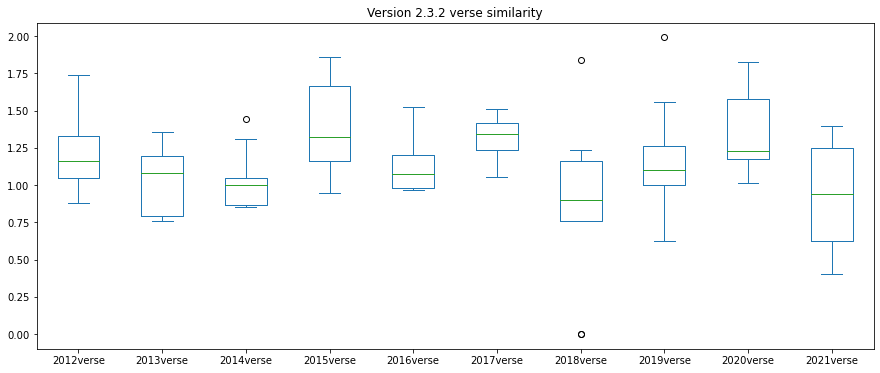

In [98]:
df_root_index_verse_v3_progression = df_root_index_whole_v3_progression[['2012verse','2013verse','2014verse','2015verse','2016verse', 
                                                               '2017verse', '2018verse','2019verse','2020verse','2021verse']]
df_root_index_verse_v3_progression.plot.box(title = 'Version 2.3.2 verse similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.2 chorus similarity'}>

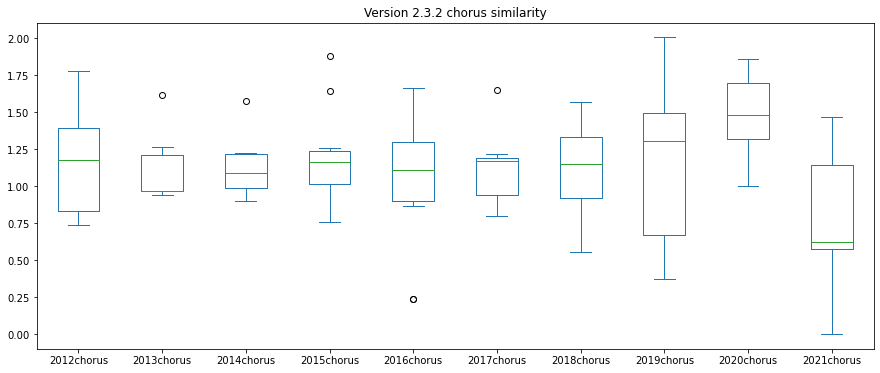

In [99]:
df_root_index_chorus_v3_progression = df_root_index_whole_v3_progression[['2012chorus','2013chorus','2014chorus','2015chorus','2016chorus', 
                                                                '2017chorus', '2018chorus','2019chorus','2020chorus','2021chorus']]
df_root_index_chorus_v3_progression.plot.box(title = 'Version 2.3.2 chorus similarity', figsize = (15, 6))

<AxesSubplot:title={'center':'Version 2.3.2 total similarity'}>

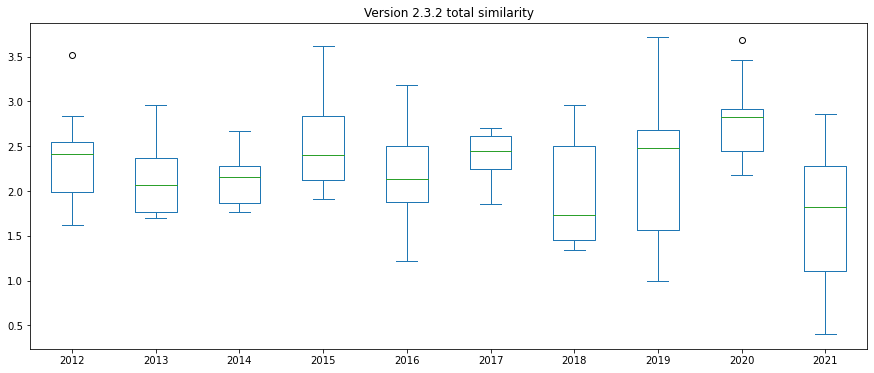

In [100]:
df_root_index_add_v3_progression.plot.box(title = 'Version 2.3.2 total similarity', figsize = (15, 6))

# Results

## boxplot

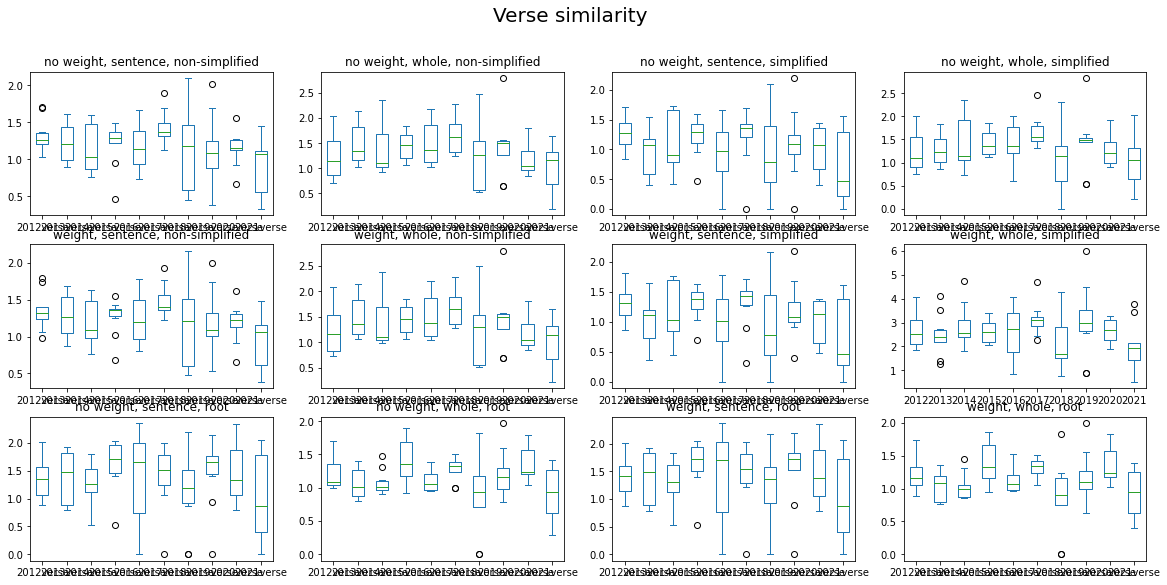

In [101]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (20, 9)) 
fig.suptitle('Verse similarity', fontsize=20)
df_index_verse_v1_sentence.plot.box(title = 'no weight, sentence, non-simplified', ax=axes[0,0])
df_index_verse_v1_progression.plot.box(title = 'no weight, whole, non-simplified', ax=axes[0,1])
df_simplified_verse_whole_v1_sentence.plot.box(title = 'no weight, sentence, simplified', ax=axes[0,2])
df_simplified_verse_whole_v1_progression.plot.box(title = 'no weight, whole, simplified', ax=axes[0,3])
df_index_verse_v2_sentence.plot.box(title = 'weight, sentence, non-simplified', ax=axes[1,0])
df_index_verse_v2_progression.plot.box(title = 'weight, whole, non-simplified', ax=axes[1,1])
df_simplified_verse_whole_v2_sentence.plot.box(title = 'weight, sentence, simplified', ax=axes[1,2])
df_simplified_add_v2_progression.plot.box(title = 'weight, whole, simplified', ax=axes[1,3])
df_index_verse_v3_sentence.plot.box(title = 'no weight, sentence, root', ax=axes[2,0])
df_index_verse_v3_progression.plot.box(title = 'no weight, whole, root', ax=axes[2,1])
df_root_index_verse_v3_sentence.plot.box(title = 'weight, sentence, root', ax=axes[2,2])
df_root_index_verse_v3_progression.plot.box(title = 'weight, whole, root', ax=axes[2,3])
plt.show()

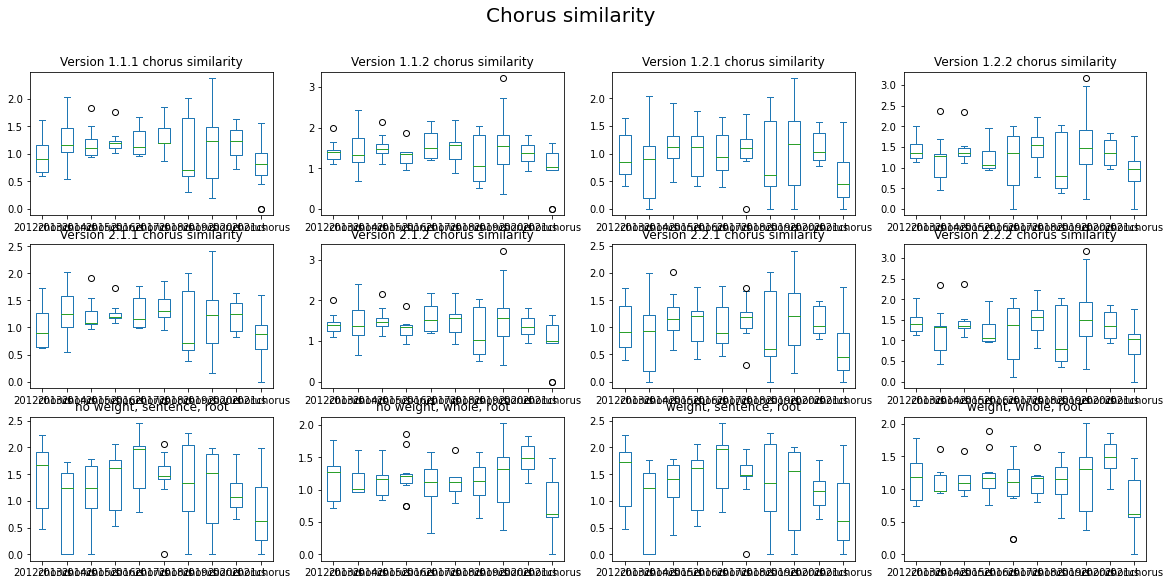

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (20, 9)) 
fig.suptitle('Chorus similarity', fontsize=20)
df_index_chorus_v1_sentence.plot.box(title = 'Version 1.1.1 chorus similarity', ax=axes[0,0])
df_index_chorus_v1_progression.plot.box(title = 'Version 1.1.2 chorus similarity', ax=axes[0,1])
df_simplified_chorus_v1_sentence.plot.box(title = 'Version 1.2.1 chorus similarity', ax=axes[0,2])
df_simplified_chorus_v1_progression.plot.box(title = 'Version 1.2.2 chorus similarity', ax=axes[0,3])
df_index_chorus_v2_sentence.plot.box(title = 'Version 2.1.1 chorus similarity', ax=axes[1,0])
df_index_chorus_v2_progression.plot.box(title = 'Version 2.1.2 chorus similarity', ax=axes[1,1])
df_simplified_chorus_v2_sentence.plot.box(title = 'Version 2.2.1 chorus similarity', ax=axes[1,2])
df_simplified_chorus_v2_progression.plot.box(title = 'Version 2.2.2 chorus similarity', ax=axes[1,3])
df_index_chorus_v3_sentence.plot.box(title = 'Version 1.3.1 chorus similarity', ax=axes[2,0])
df_index_chorus_v3_progression.plot.box(title = 'Version 1.3.2 chorus similarity', ax=axes[2,1])
df_root_index_chorus_v3_sentence.plot.box(title = 'Version 2.3.1 chorus similarity', ax=axes[2,2])
df_root_index_chorus_v3_progression.plot.box(title = 'Version 2.3.2 chorus similarity', ax=axes[2,3])
plt.show()

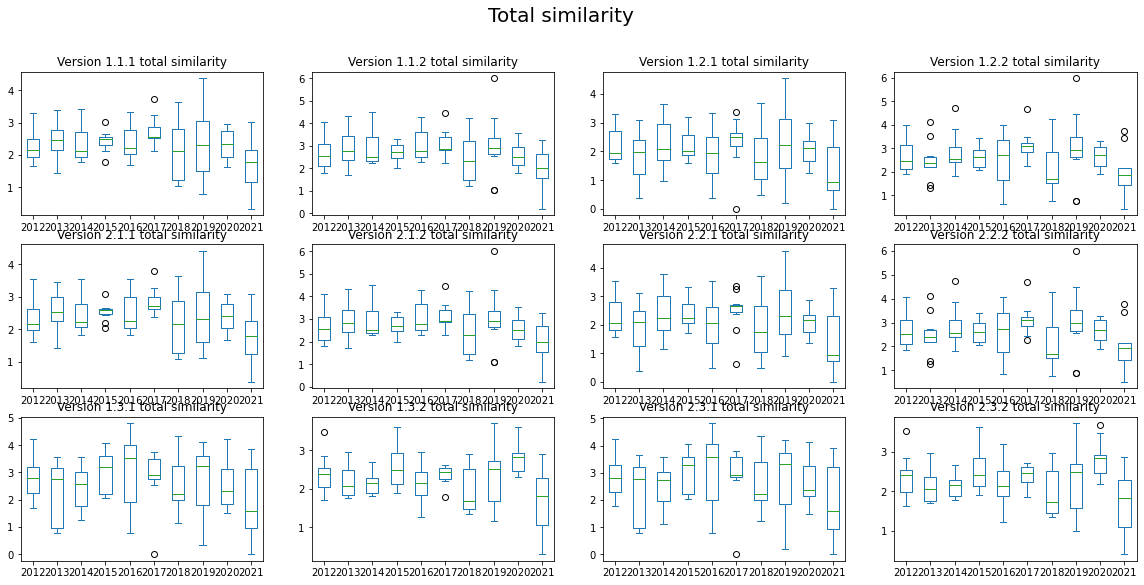

In [103]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (20, 9)) 
fig.suptitle('Total similarity', fontsize=20)
df_index_add_v1_sentence.plot.box(title = 'Version 1.1.1 total similarity', ax=axes[0,0])
df_index_add_v1_progression.plot.box(title = 'Version 1.1.2 total similarity', ax=axes[0,1])
df_simplified_add_v1_sentence.plot.box(title = 'Version 1.2.1 total similarity', ax=axes[0,2])
df_simplified_add_v1_progression.plot.box(title = 'Version 1.2.2 total similarity', ax=axes[0,3])
df_index_add_v2_sentence.plot.box(title = 'Version 2.1.1 total similarity', ax=axes[1,0])
df_index_add_v2_progression.plot.box(title = 'Version 2.1.2 total similarity', ax=axes[1,1])
df_simplified_add_v2_sentence.plot.box(title = 'Version 2.2.1 total similarity', ax=axes[1,2])
df_simplified_add_v2_progression.plot.box(title = 'Version 2.2.2 total similarity', ax=axes[1,3])
df_index_add_v3_sentence.plot.box(title = 'Version 1.3.1 total similarity', ax=axes[2,0])
df_index_add_v3_progression.plot.box(title = 'Version 1.3.2 total similarity', ax=axes[2,1])
df_root_index_add_v3_sentence.plot.box(title = 'Version 2.3.1 total similarity', ax=axes[2,2])
df_root_index_add_v3_progression.plot.box(title = 'Version 2.3.2 total similarity', ax=axes[2,3])
plt.show()

# TO DO LIST (undecided)
1. Collect more data (but not necessary)
2. Human rating similarity (time-consuming and not practical)
3. Parameter tuning for chords' weights
4. If there is enough time, try to do chord detections (machine learning) and combine the two projects together.
5. (ONLY FOR FUN) Make a GUI for this program

# NEW IDEAS
1. Feb 28: Autocorrelation function concept
2. Mar 02: Consider a group as a new element, build up a new matrix based on the chunks
3. Mar 08: How to measure the chord progression similarity based on progression groups? Should there be any weight? Or an other transition matrix should be built?
4. 